**capstone project** for statify 1.0 by FEBS, IIT Bhubaneshwar
# **Credit Card Fraud Detection**
by Anup Shinde


**Importing Necessary Libraries**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**EDA**

Basic information

In [16]:
data = pd.read_csv('creditcard.csv')

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
data.shape

(284807, 31)

Plots

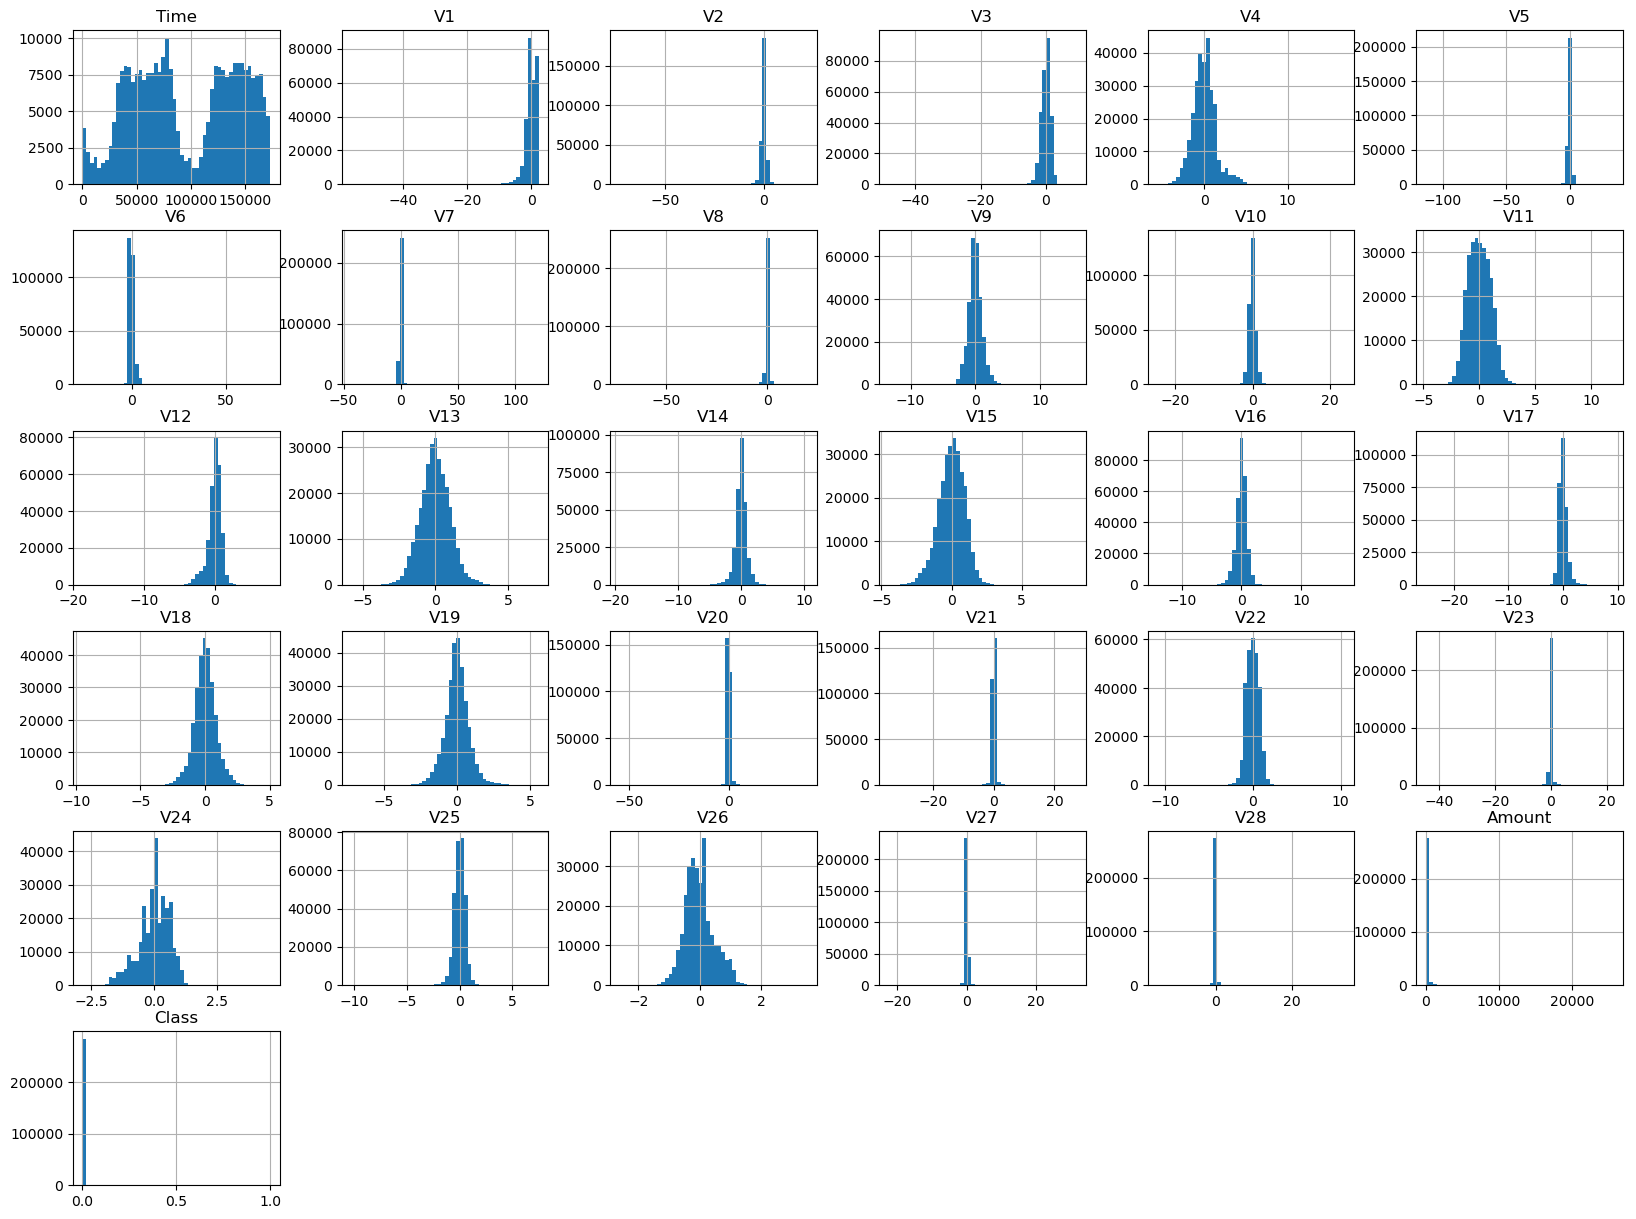

In [32]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

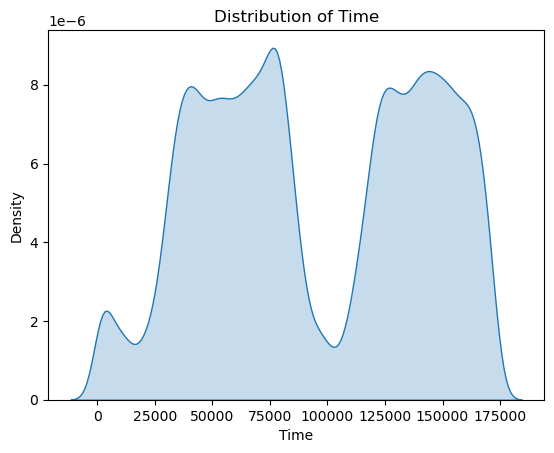

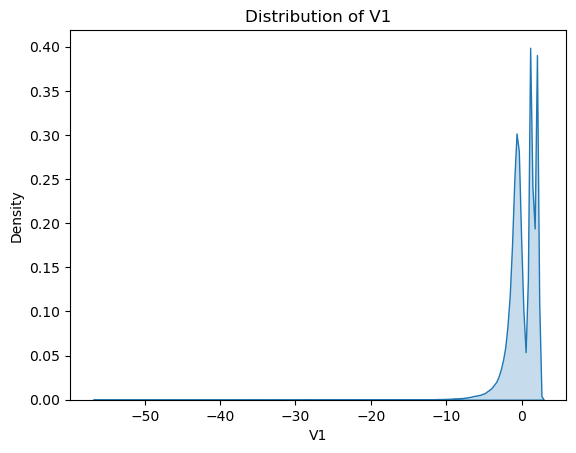

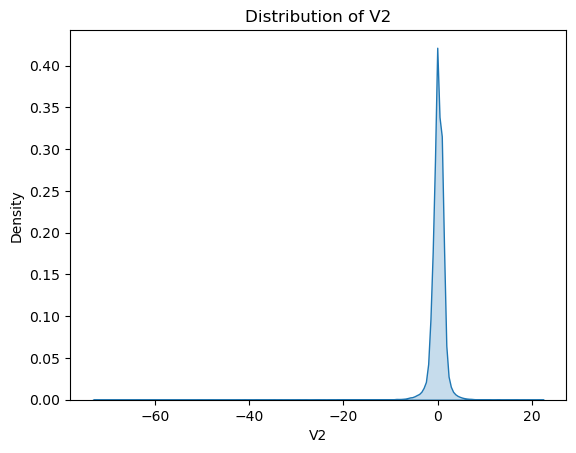

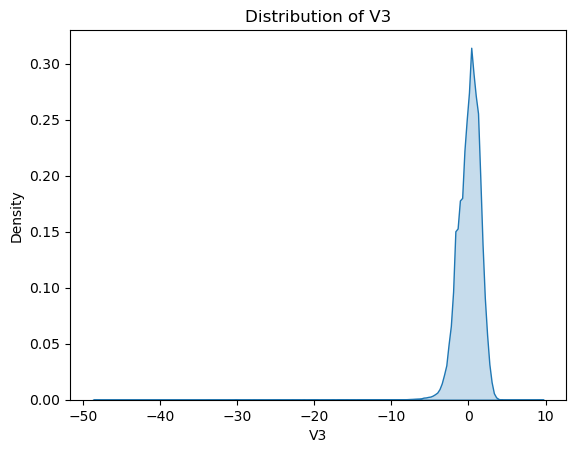

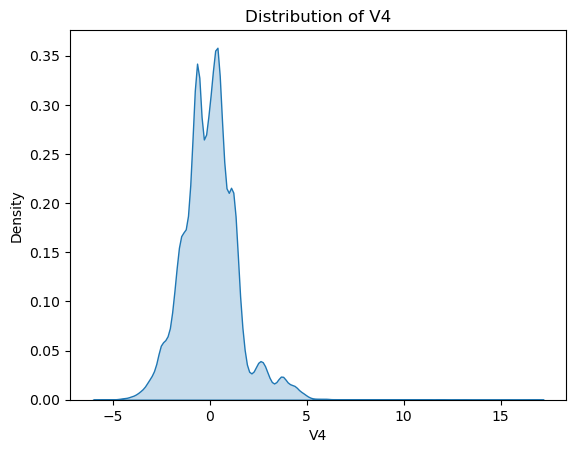

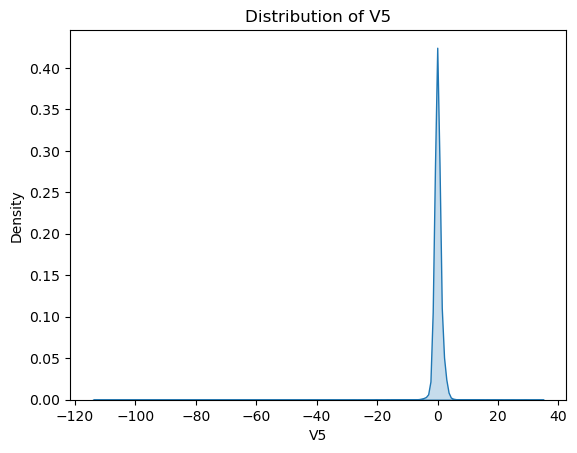

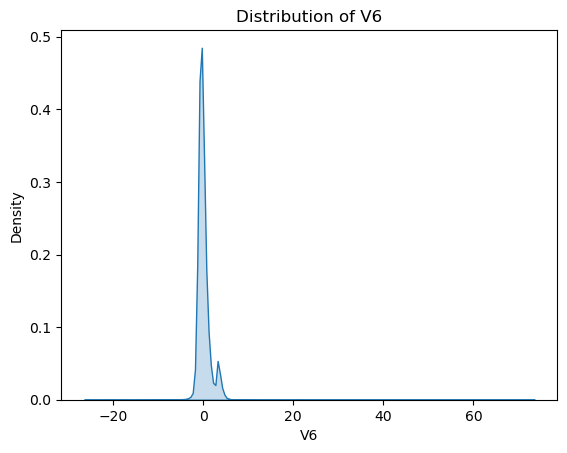

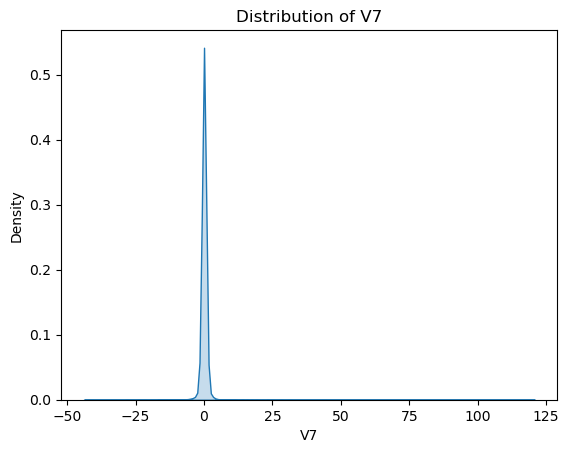

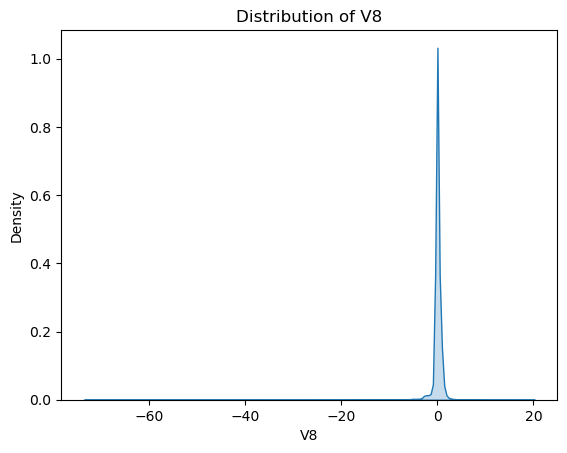

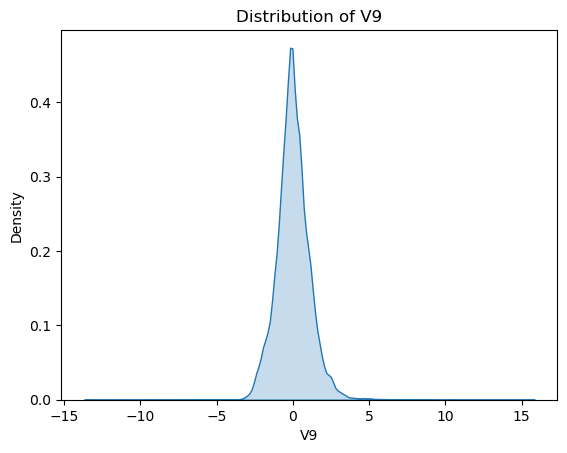

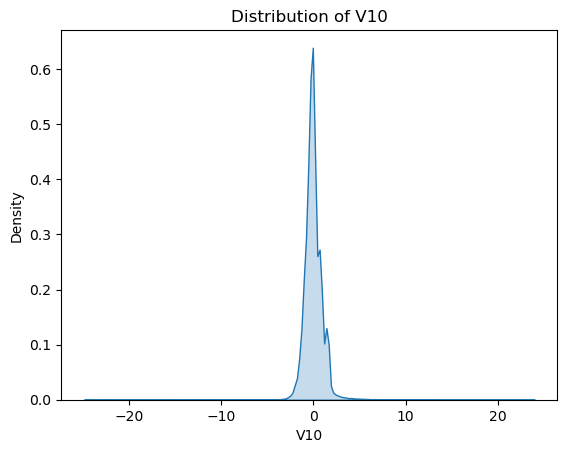

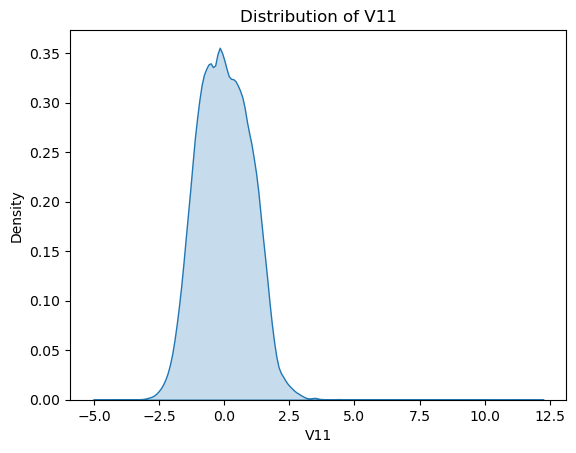

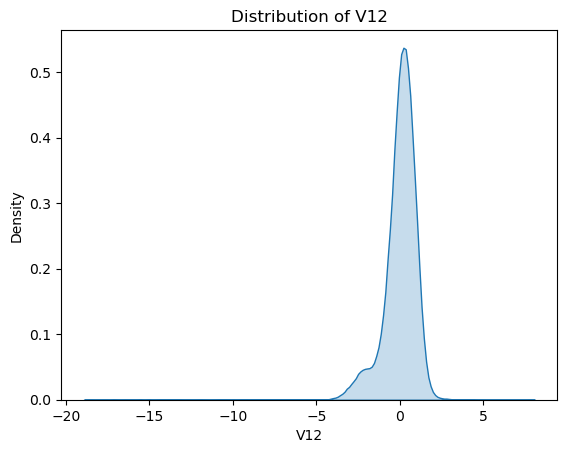

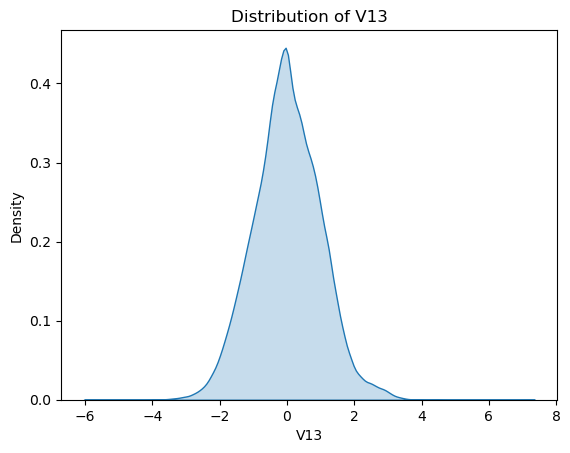

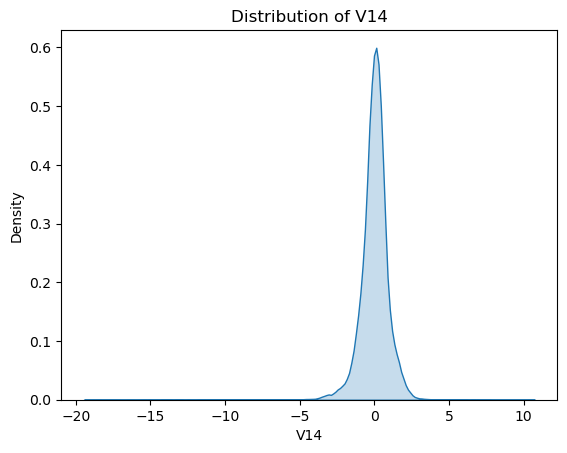

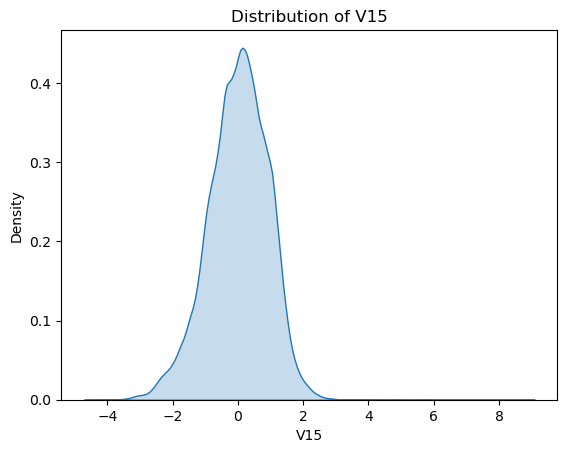

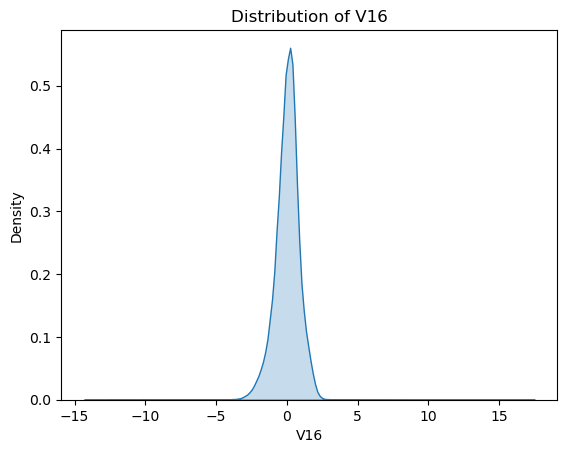

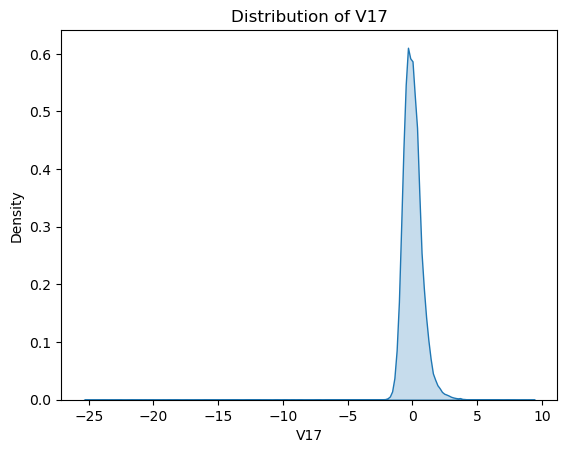

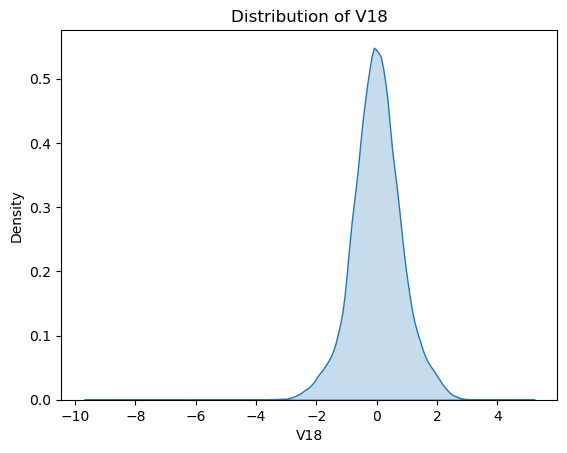

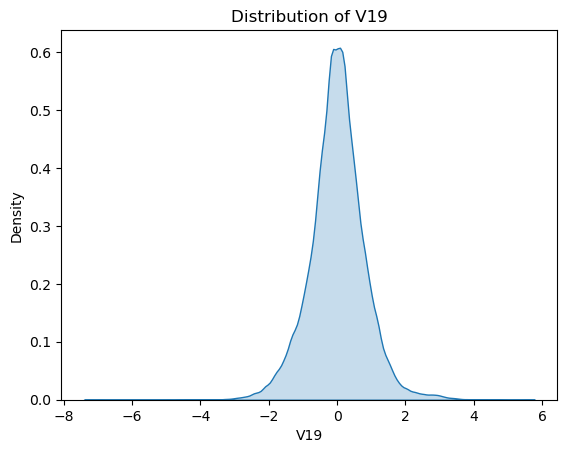

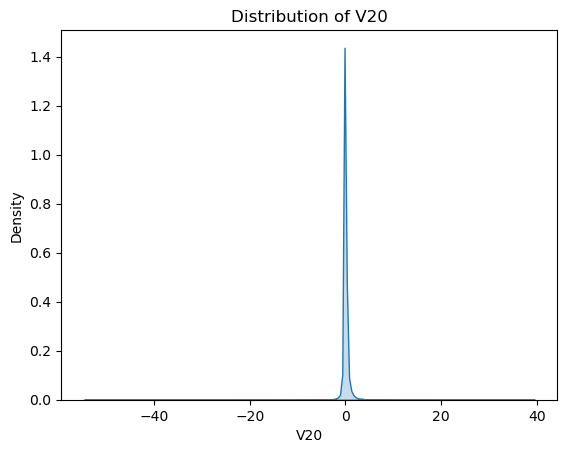

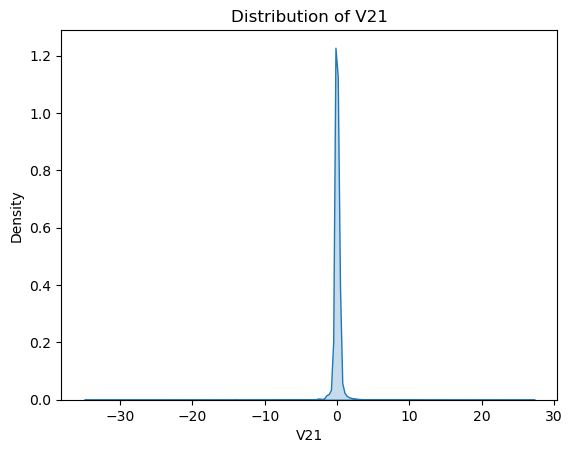

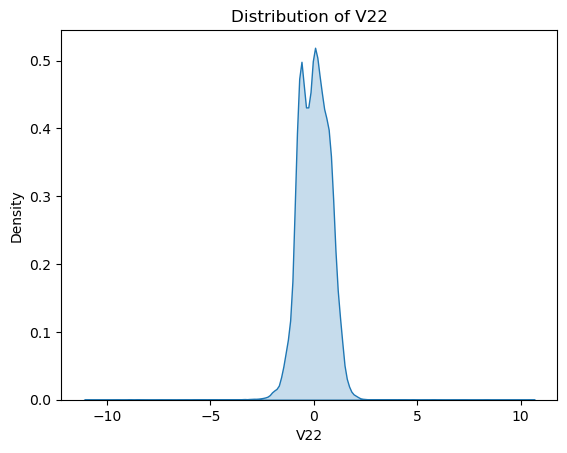

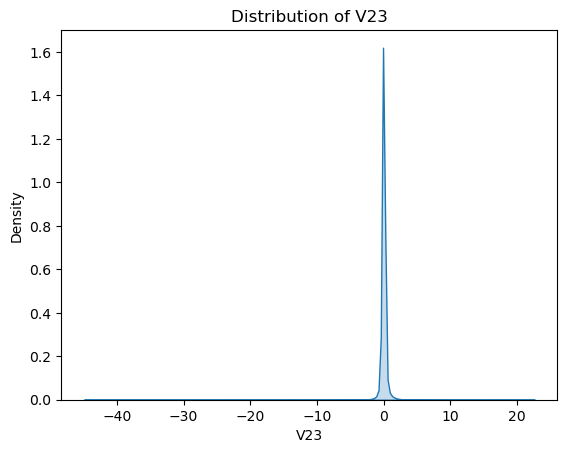

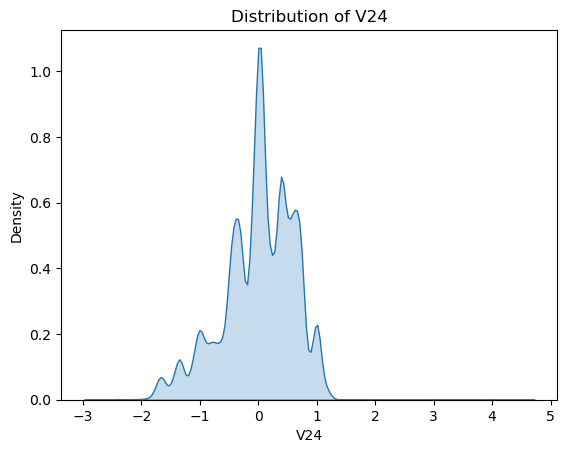

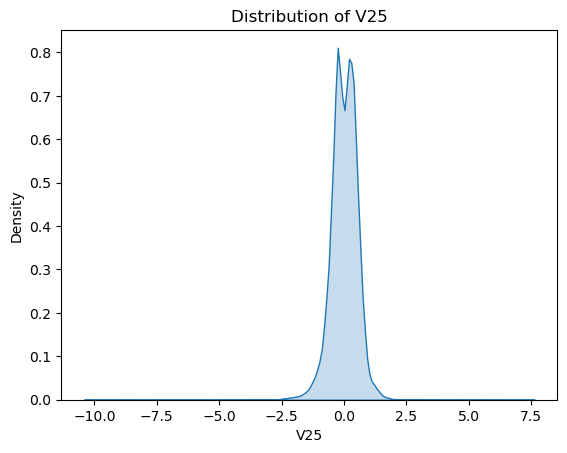

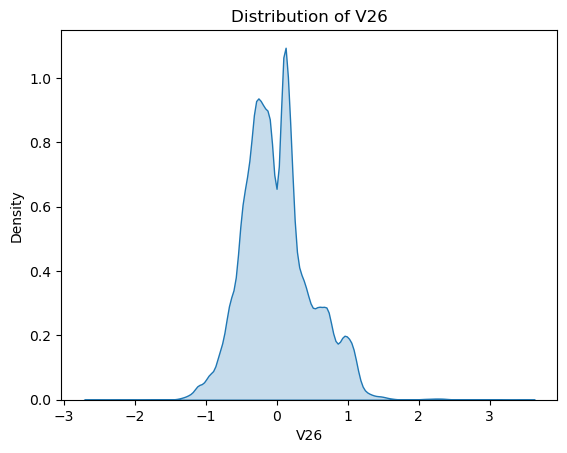

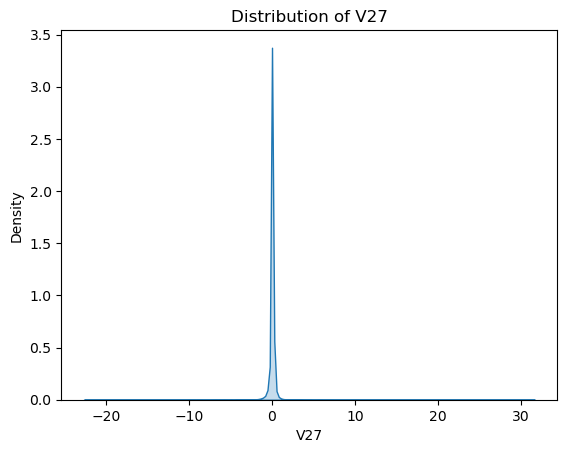

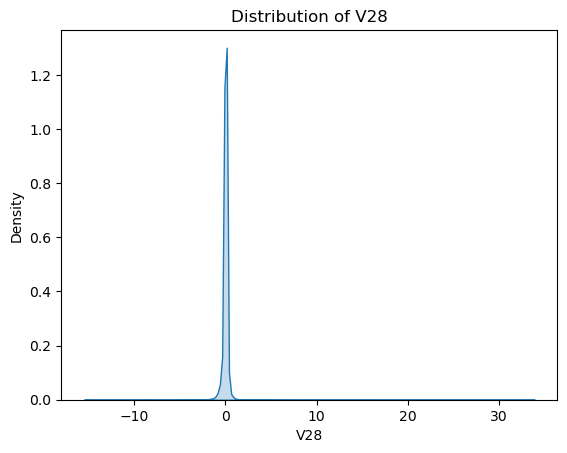

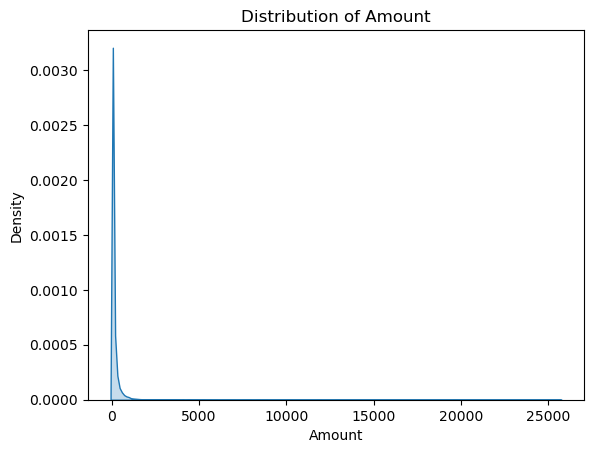

In [30]:
for column in data.columns:
    if data[column].dtype == 'float64':
        sns.kdeplot(data[column], shade=True)
        plt.title(f'Distribution of {column}')
        plt.show()

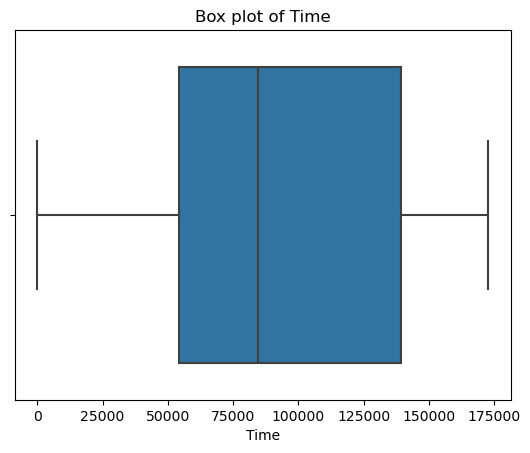

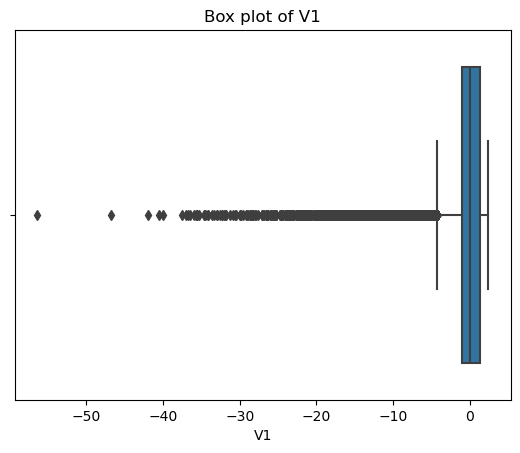

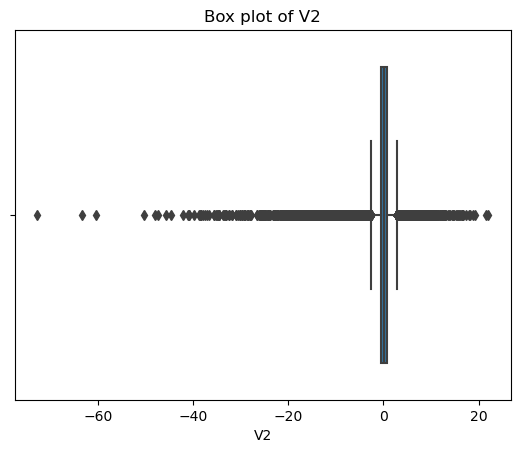

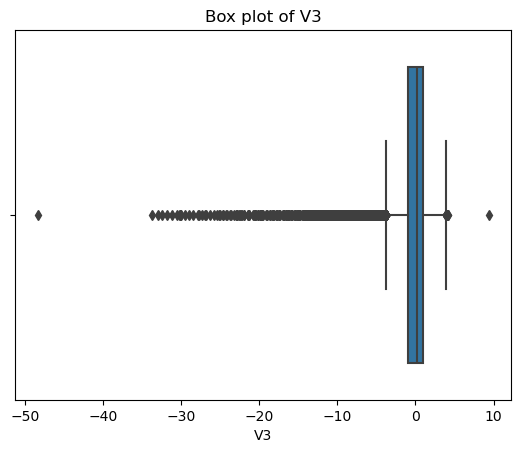

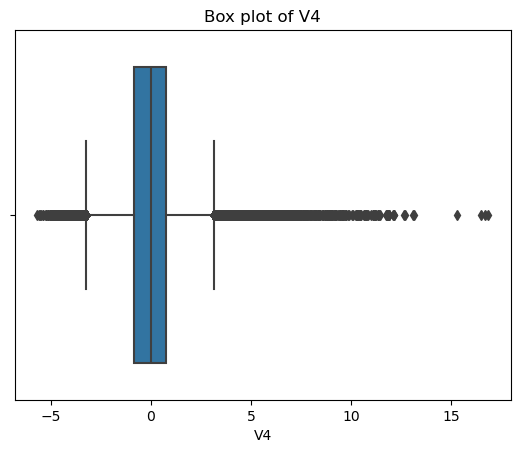

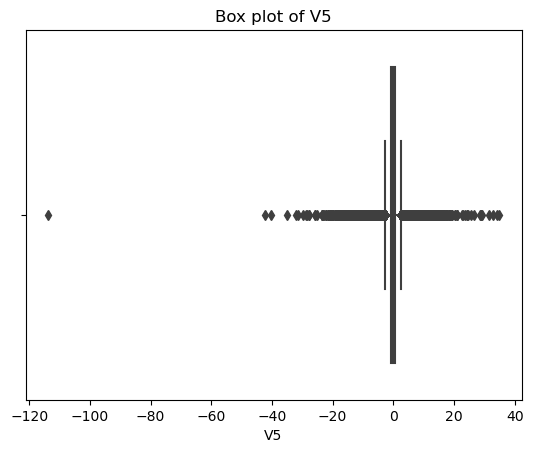

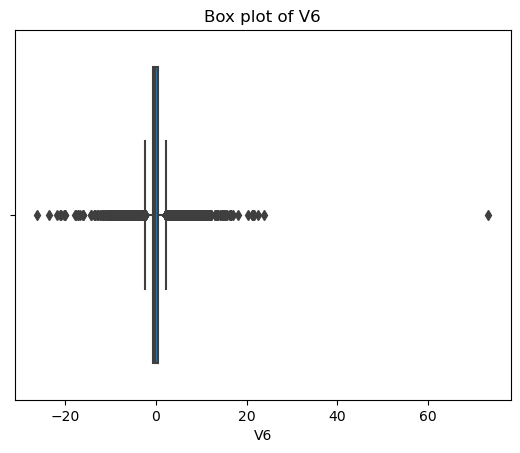

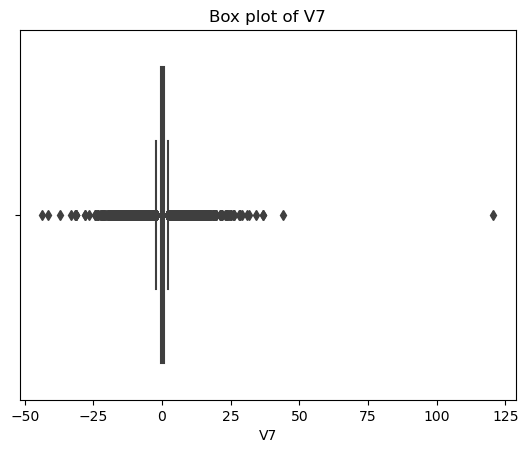

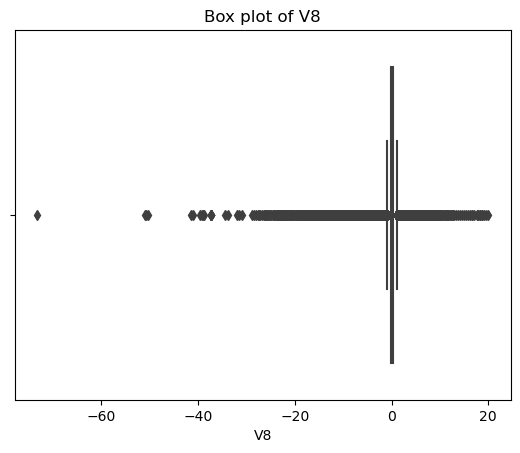

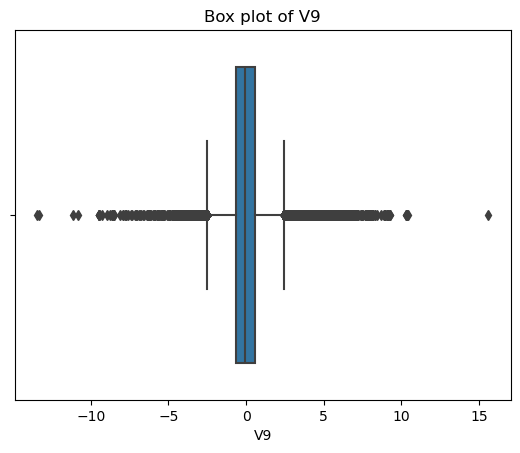

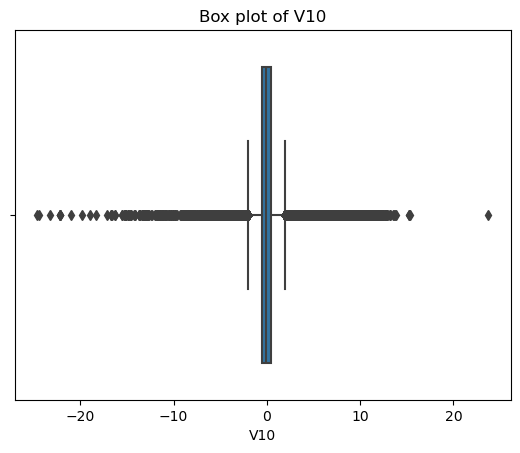

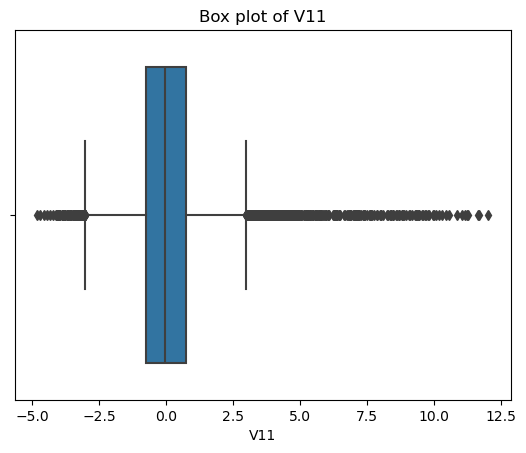

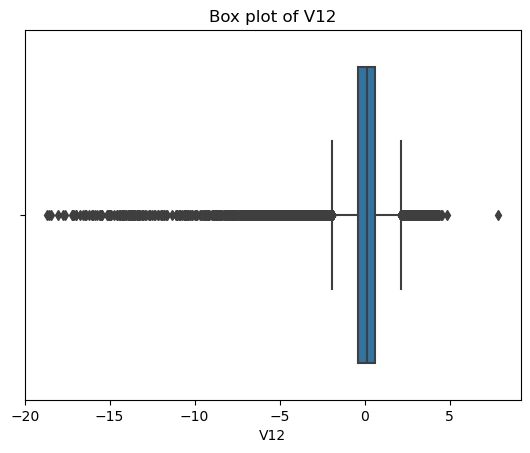

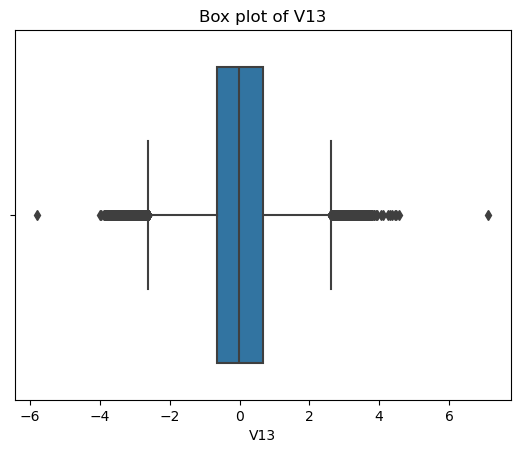

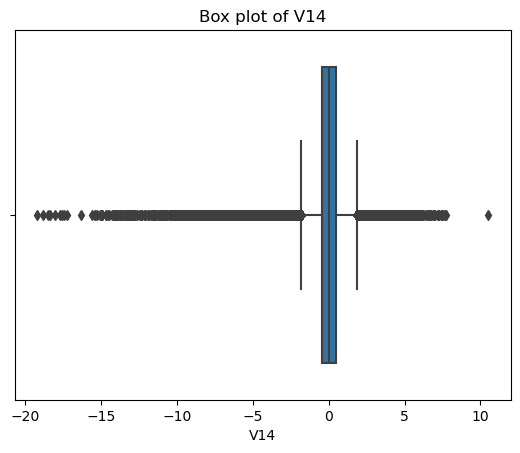

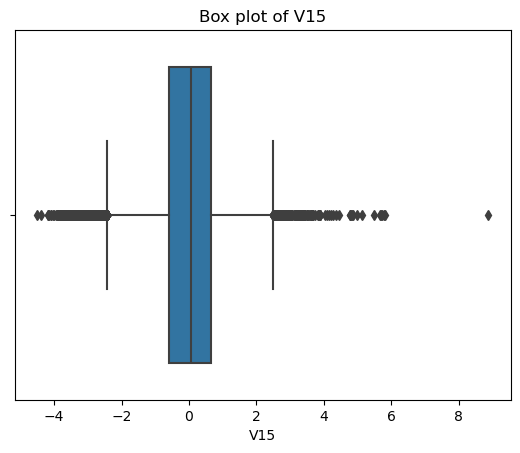

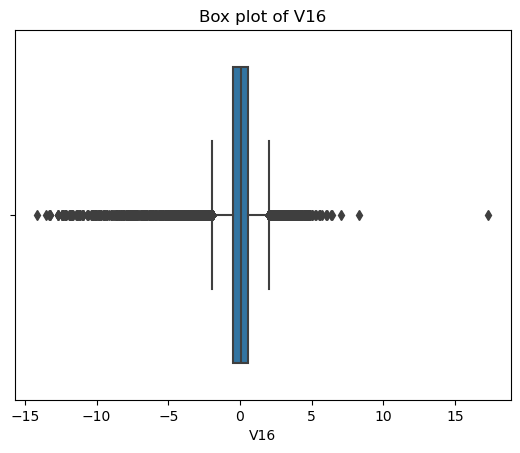

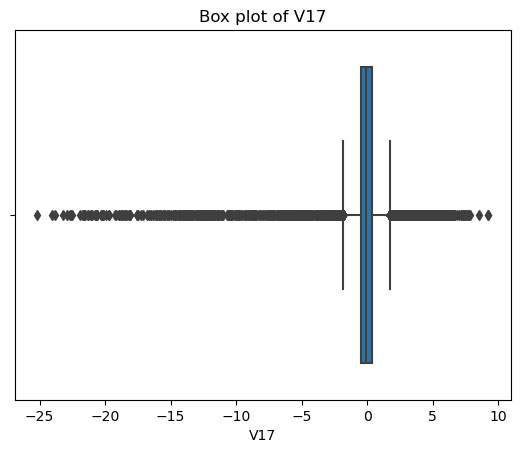

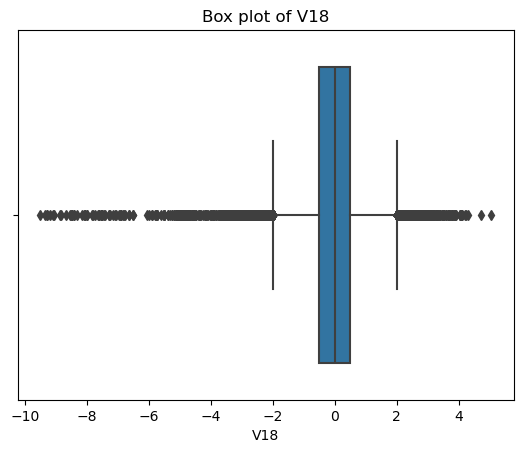

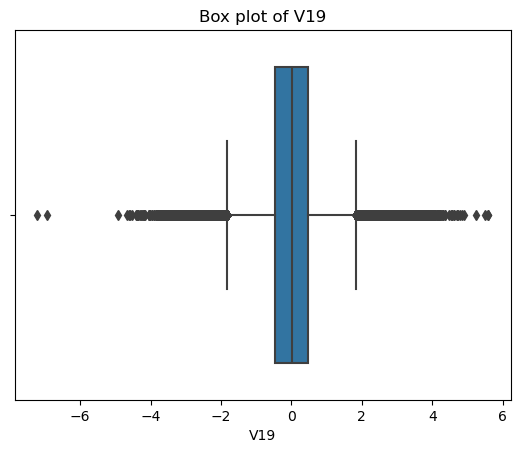

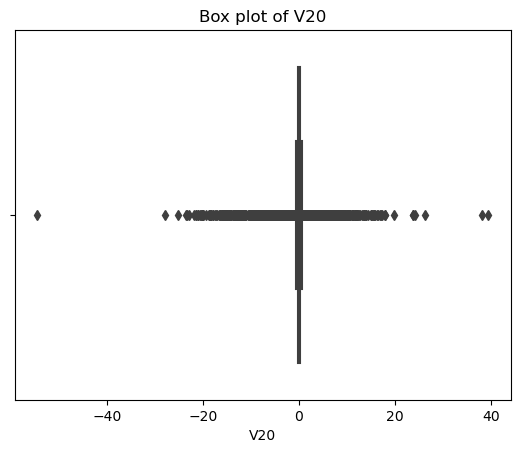

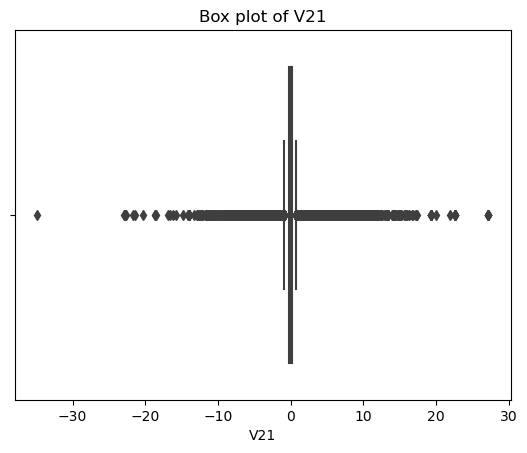

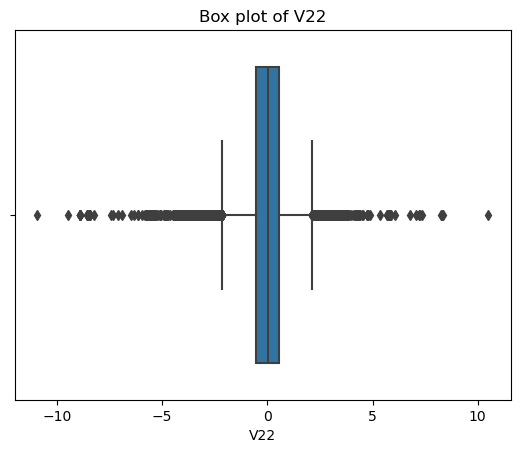

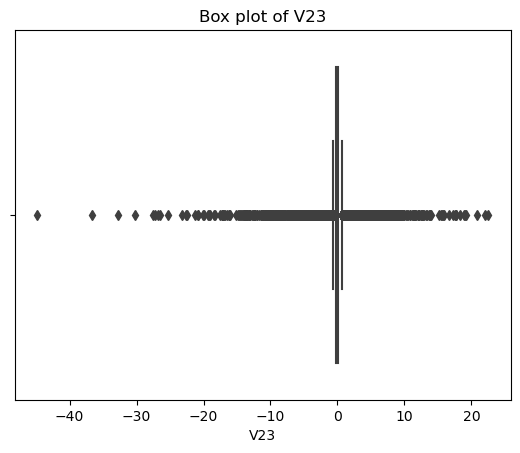

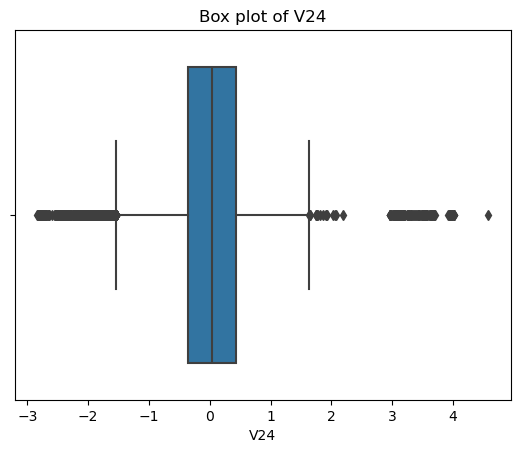

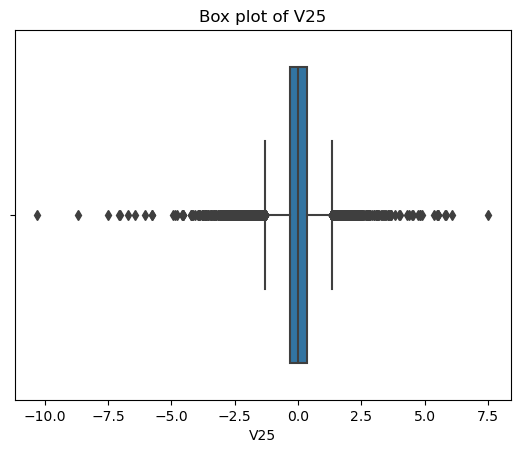

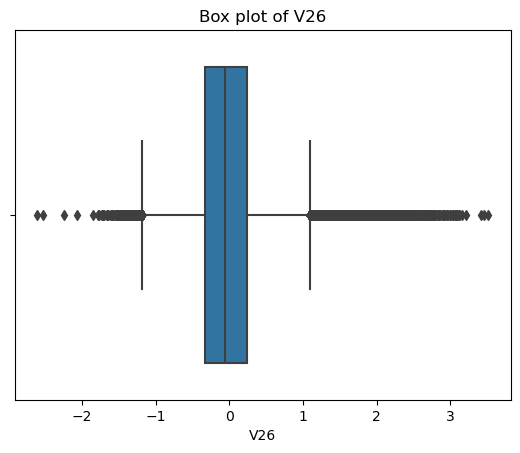

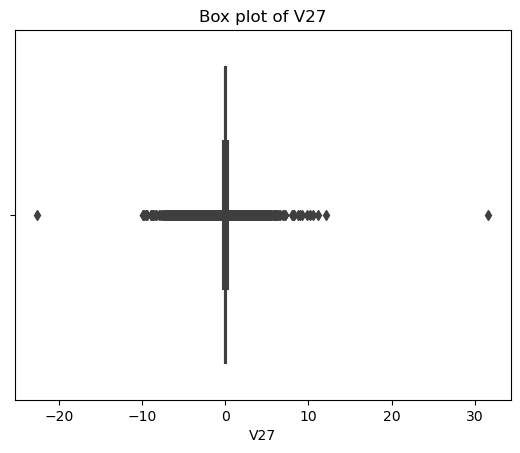

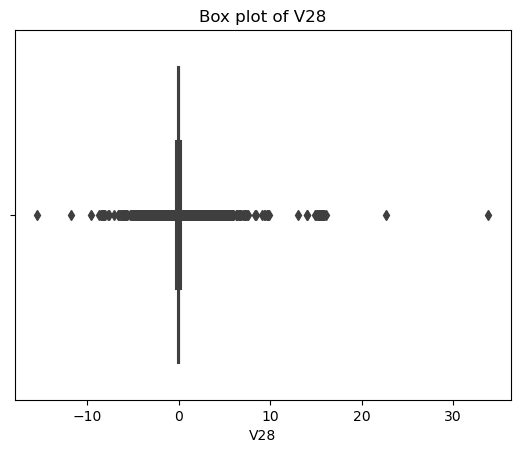

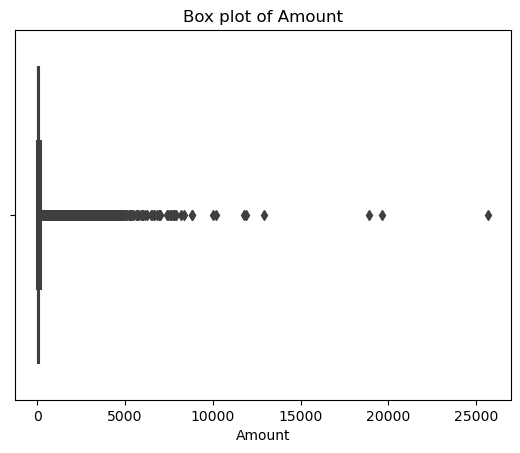

In [29]:
for column in data.columns:
    if data[column].dtype == 'float64':
        sns.boxplot(x=data[column])
        plt.title(f'Box plot of {column}')
        plt.show()

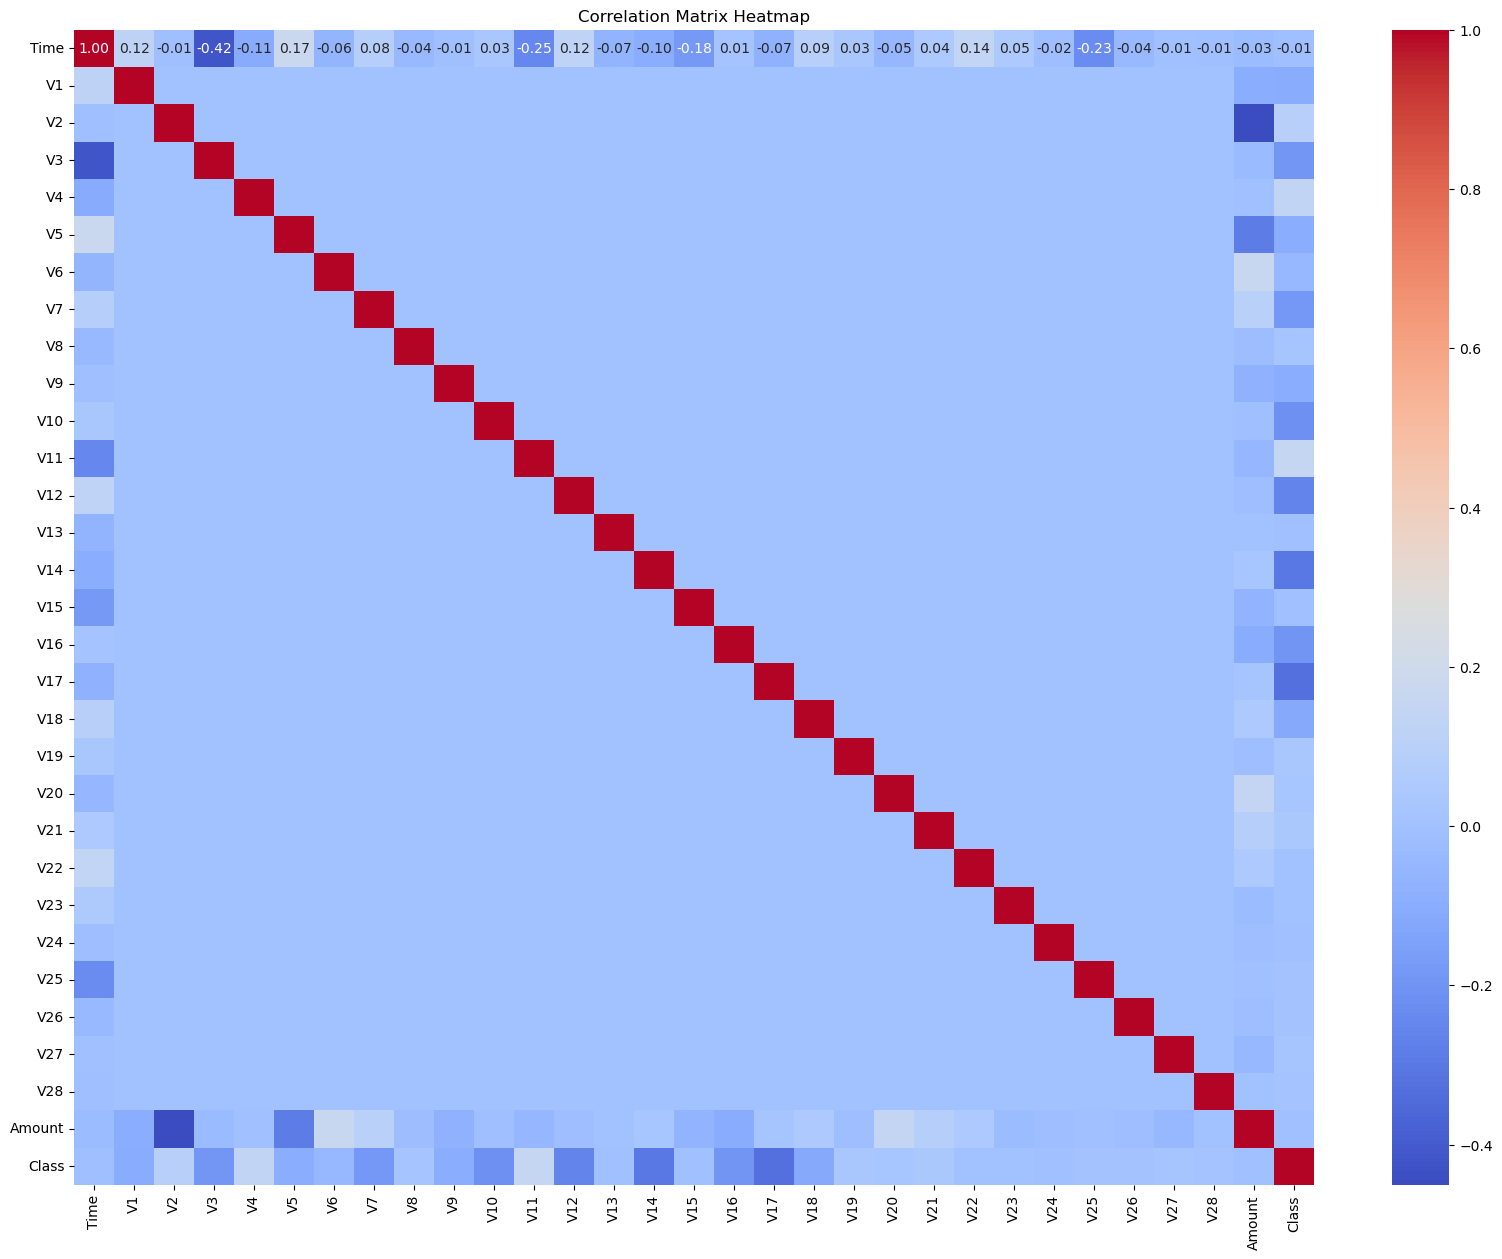

In [104]:
corr_matrix = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [38]:
skew_kurt = pd.DataFrame({
    'Feature': data.columns,
    'Skewness': data.skew(),
    'Kurtosis': data.kurt()
})
print(skew_kurt)

       Feature   Skewness    Kurtosis
Time      Time  -0.035568   -1.293530
V1          V1  -3.280667   32.486679
V2          V2  -4.624866   95.773106
V3          V3  -2.240155   26.619551
V4          V4   0.676292    2.635455
V5          V5  -2.425901  206.904560
V6          V6   1.826581   42.642494
V7          V7   2.553907  405.607417
V8          V8  -8.521944  220.586974
V9          V9   0.554680    3.731311
V10        V10   1.187141   31.988239
V11        V11   0.356506    1.633921
V12        V12  -2.278401   20.241870
V13        V13   0.065233    0.195300
V14        V14  -1.995176   23.879462
V15        V15  -0.308423    0.284769
V16        V16  -1.100966   10.419131
V17        V17  -3.844914   94.799719
V18        V18  -0.259880    2.578341
V19        V19   0.109192    1.724970
V20        V20  -2.037155  271.016113
V21        V21   3.592991  207.287040
V22        V22  -0.213258    2.832967
V23        V23  -5.875140  440.088659
V24        V24  -0.552499    0.618871
V25        V

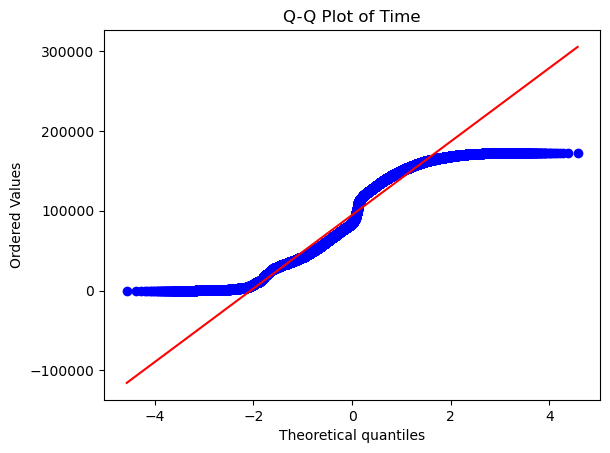

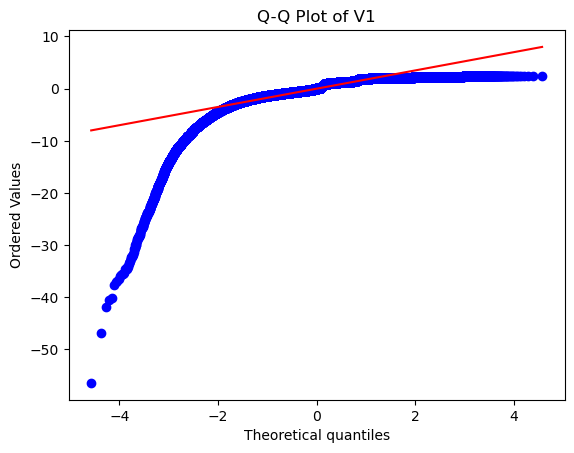

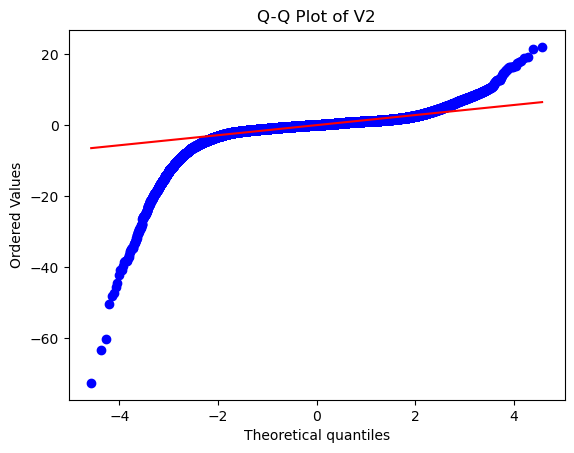

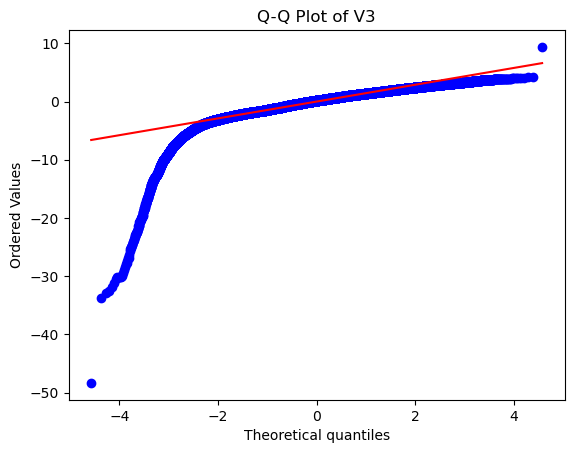

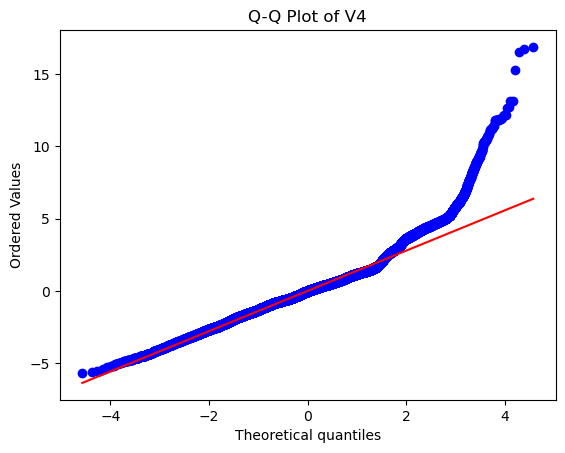

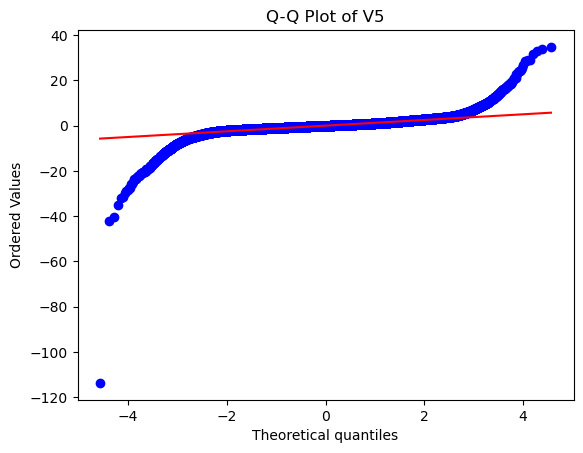

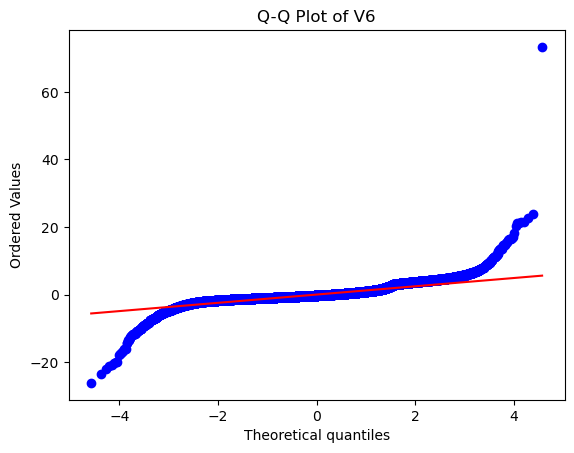

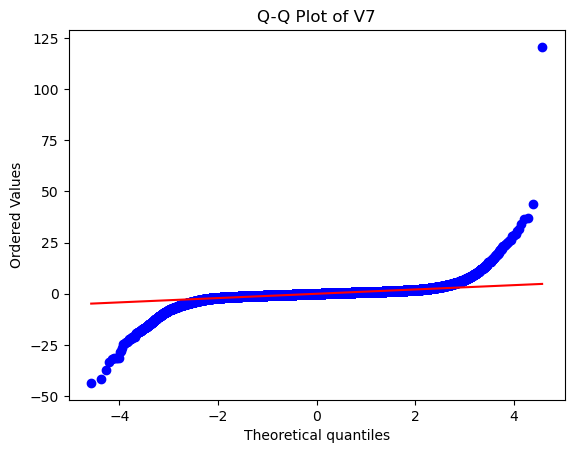

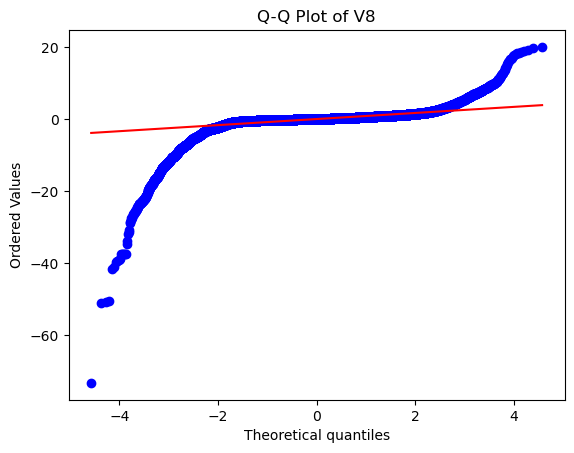

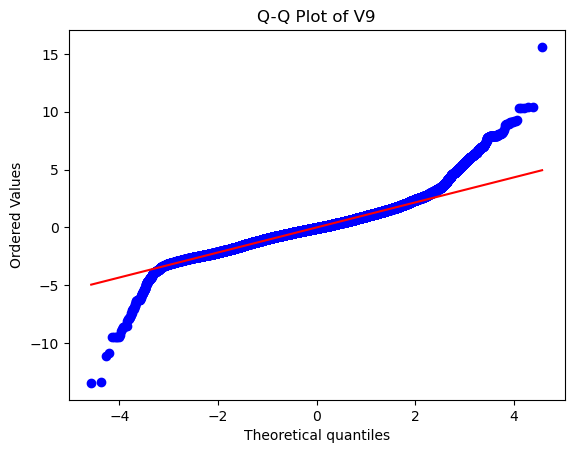

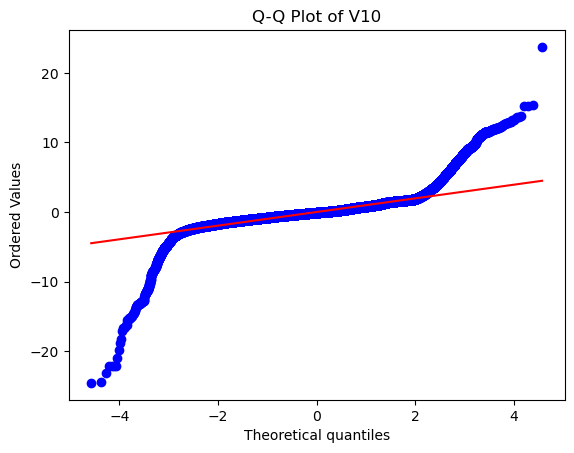

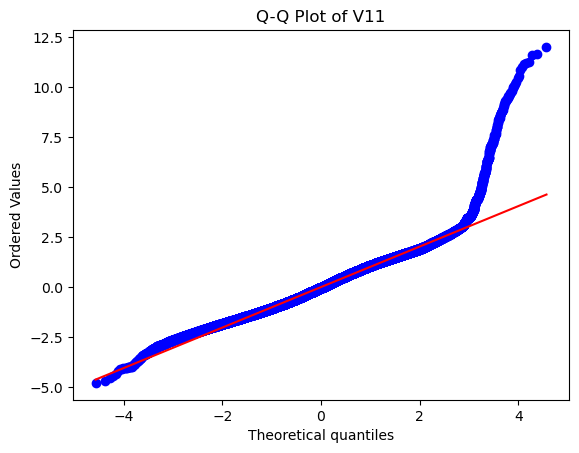

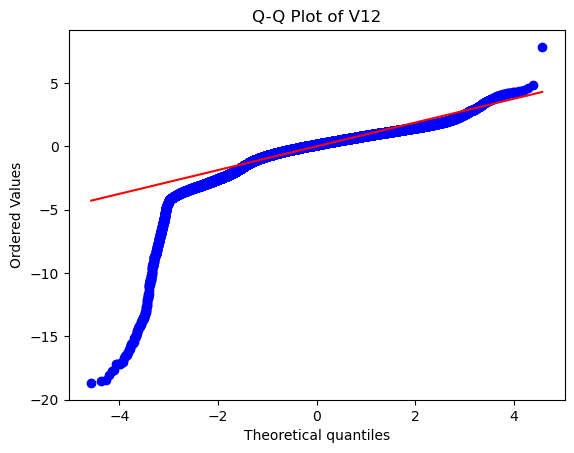

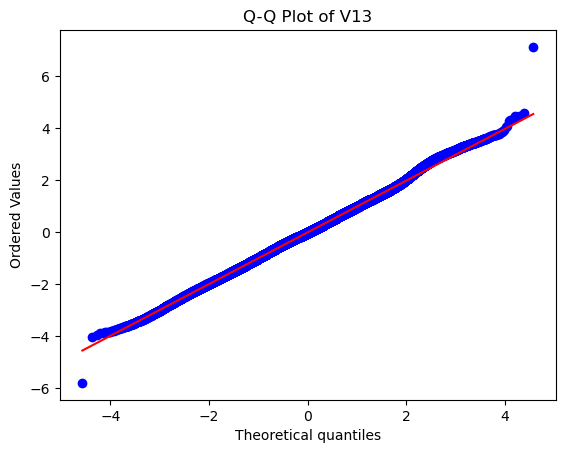

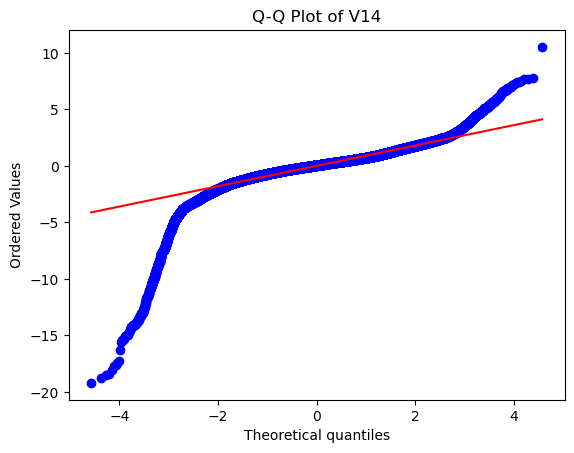

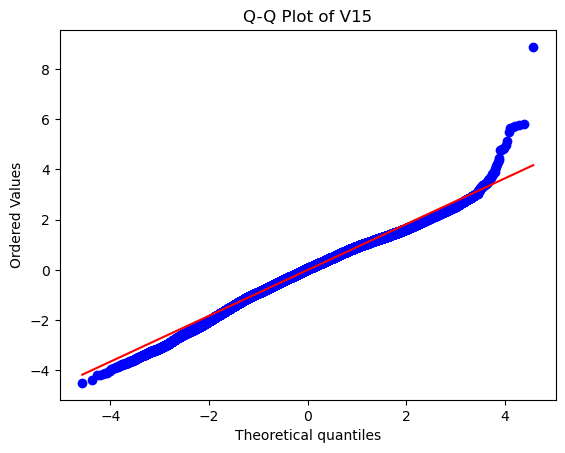

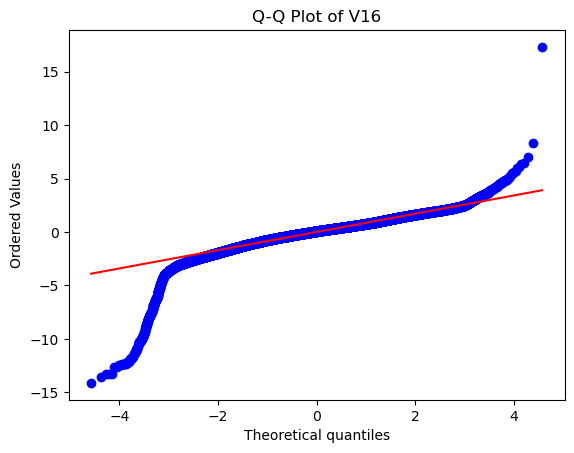

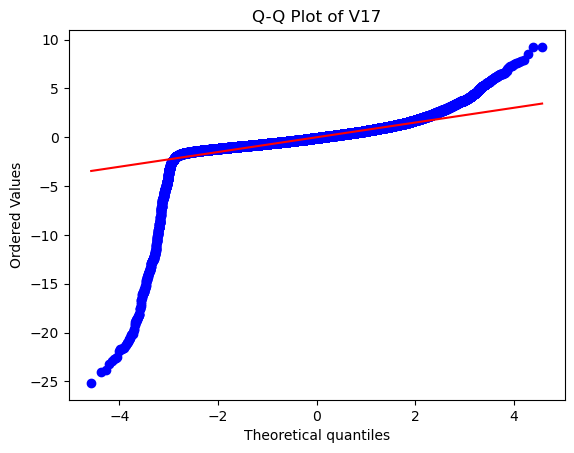

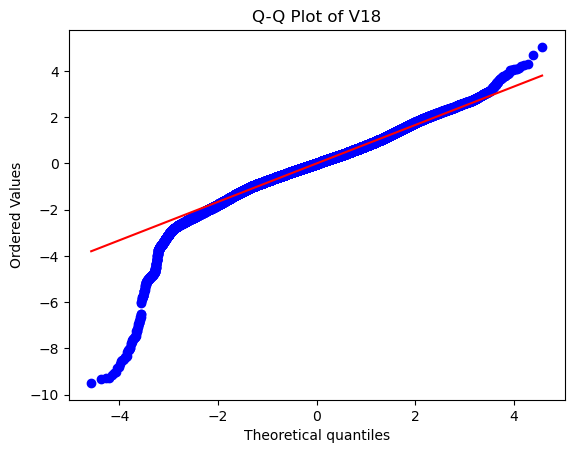

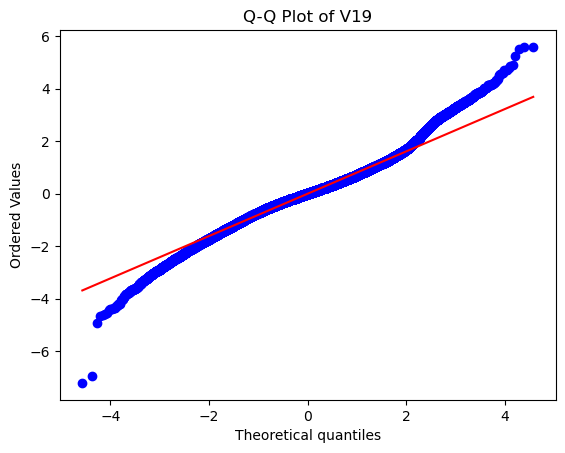

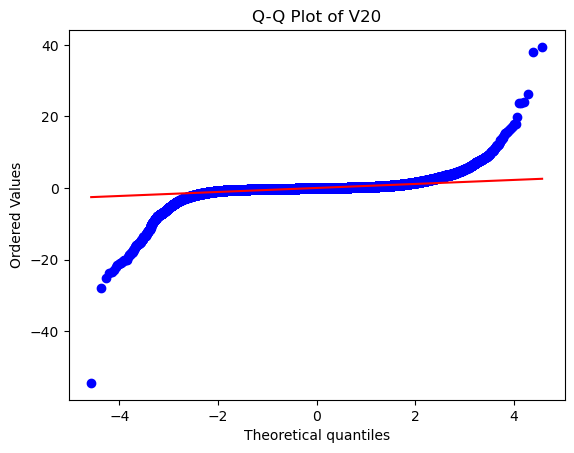

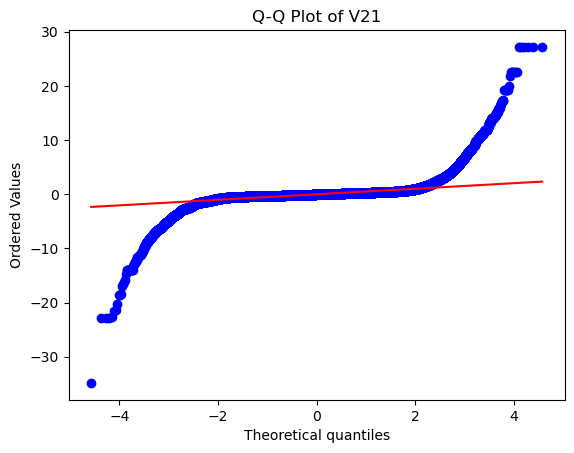

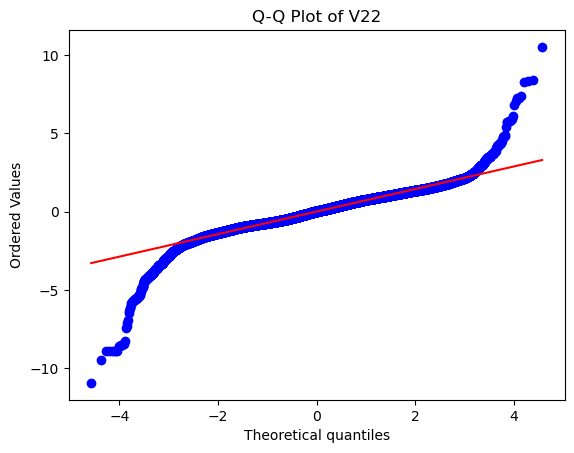

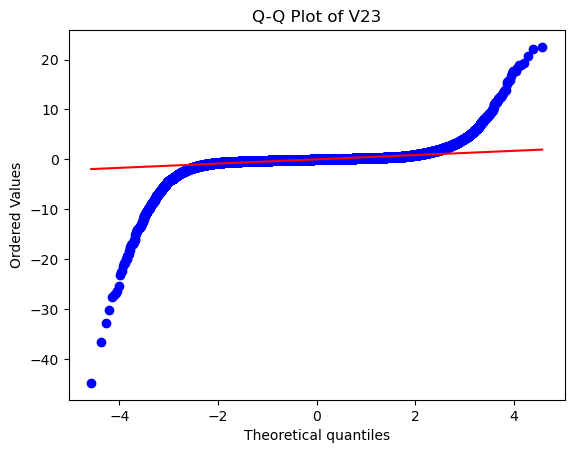

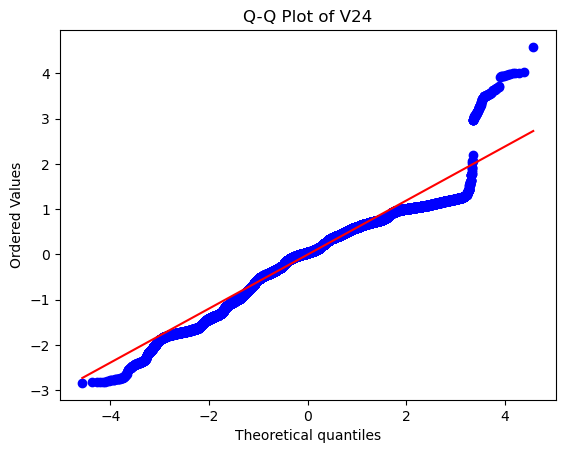

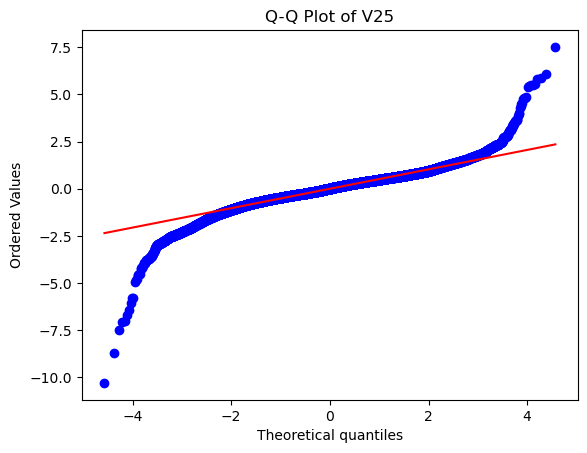

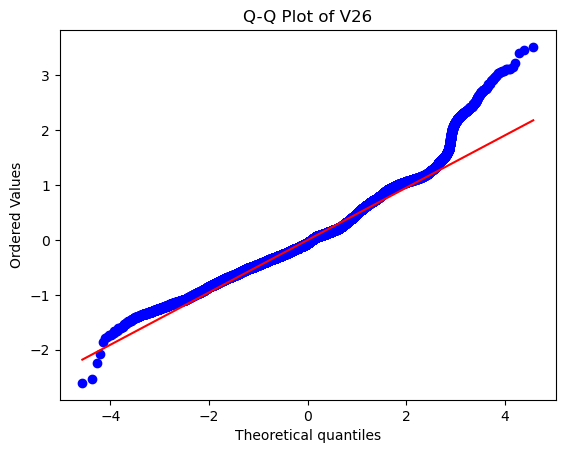

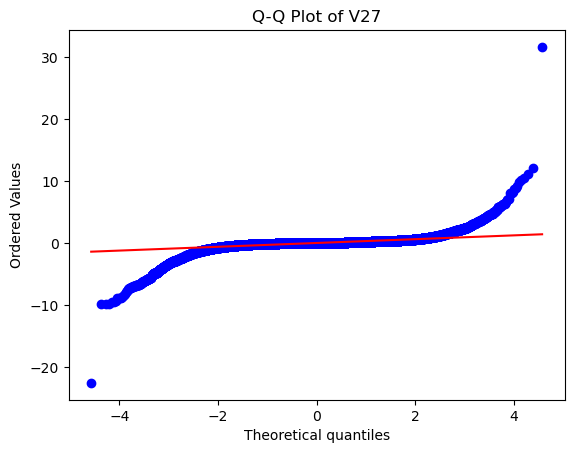

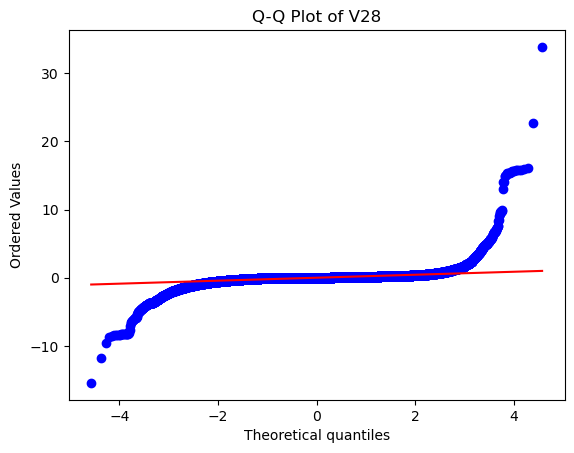

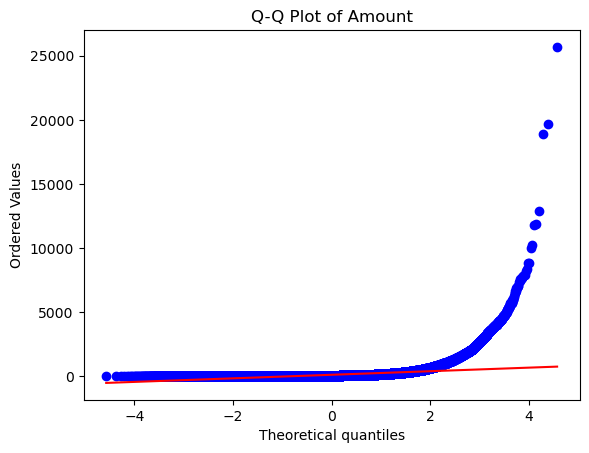

In [40]:
import scipy.stats as stats

for column in data.columns:
    if data[column].dtype == 'float64':
        stats.probplot(data[column], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {column}')
        plt.show()

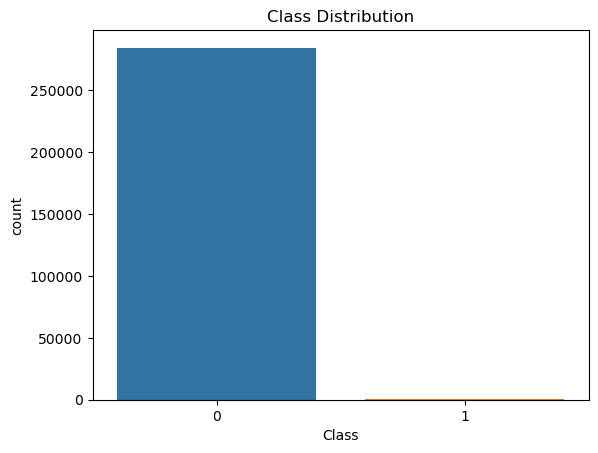

Class
0    284315
1       492
Name: count, dtype: int64


In [41]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

print(data['Class'].value_counts())

**Data Preprocessing**

In [44]:
from sklearn.preprocessing import MinMaxScaler

time_scaler = MinMaxScaler()
data['Time'] = time_scaler.fit_transform(data[['Time']])

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 
    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']] = scaler.fit_transform(
    data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']])

In [47]:
data['Amount'] = np.log1p(data['Amount'])
amount_scaler = StandardScaler()
data['Amount'] = amount_scaler.fit_transform(data[['Amount']])

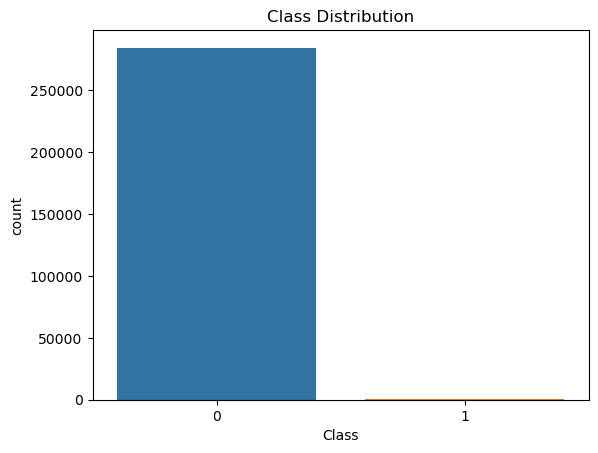

Class
0    284315
1       492
Name: count, dtype: int64


In [57]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

print(data['Class'].value_counts())

In [49]:
from imblearn.over_sampling import SMOTE

X = data.drop('Class', axis=1)
y = data['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [50]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean        0.548717 -1.506872e-17 -9.580116e-18 -8.622104e-17 -5.189230e-18   
std         0.274828  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min         0.000000 -2.879855e+01 -4.403529e+01 -3.187173e+01 -4.013919e+00   
25%         0.313681 -4.698918e-01 -3.624707e-01 -5.872142e-01 -5.993788e-01   
50%         0.490138  9.245351e-03  3.965683e-02  1.186124e-01 -1.401724e-02   
75%         0.806290  6.716939e-01  4.867202e-01  6.774569e-01  5.250082e-01   
max         1.000000  1.253351e+00  1.335775e+01  6.187993e+00  1.191874e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   3.832046e-17  9.979288e-18  1.237432e-17 -3.193372e-18  7.234983e-19   
std    1.000002e+00  1.000002e+00  1.00000

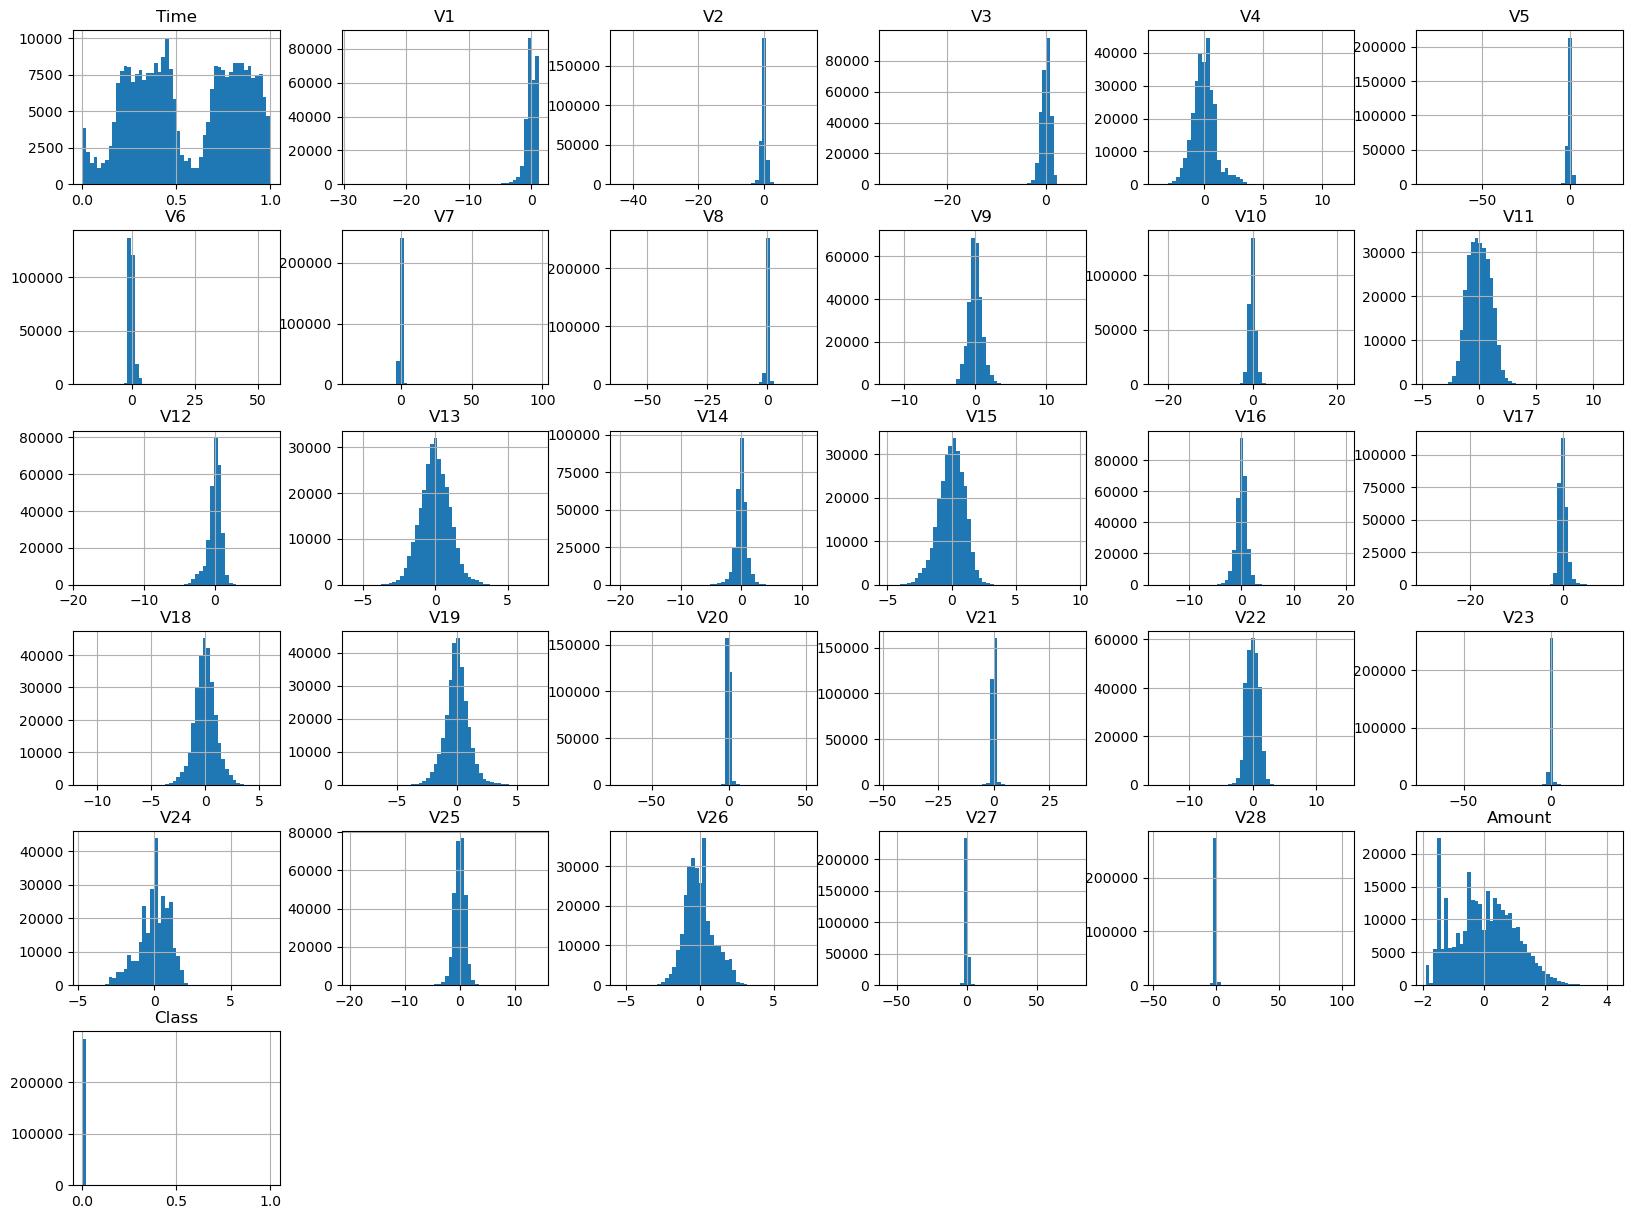

In [51]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

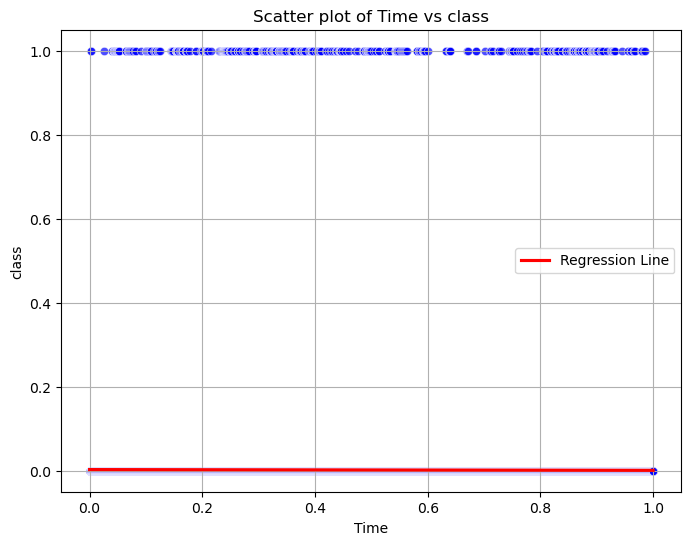

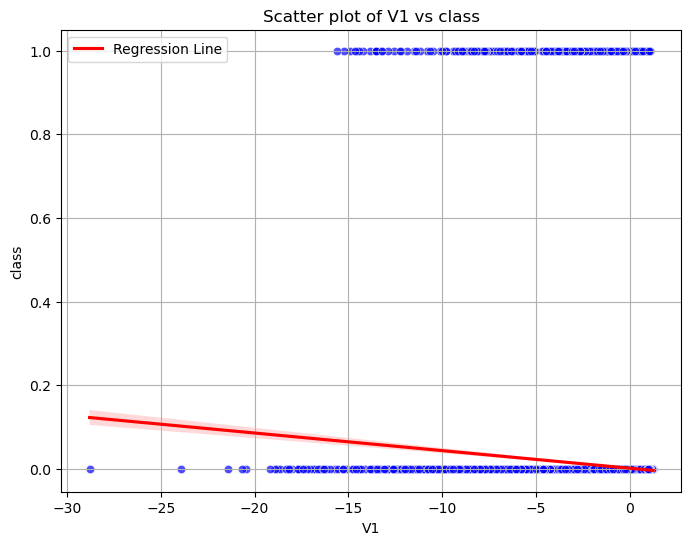

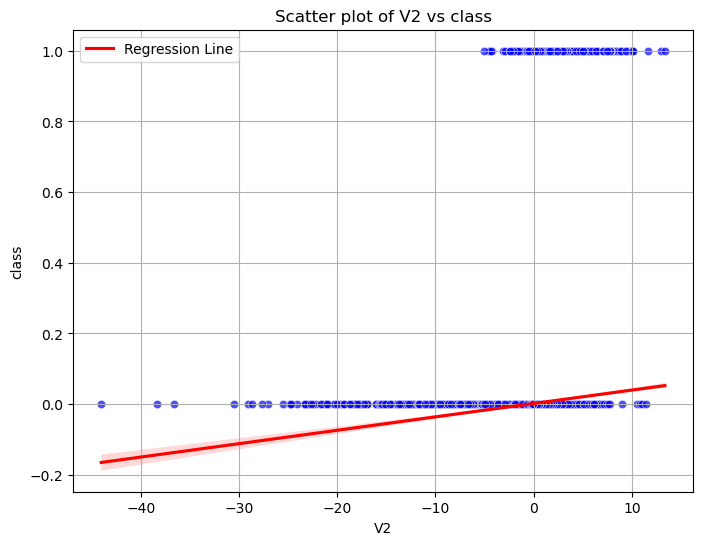

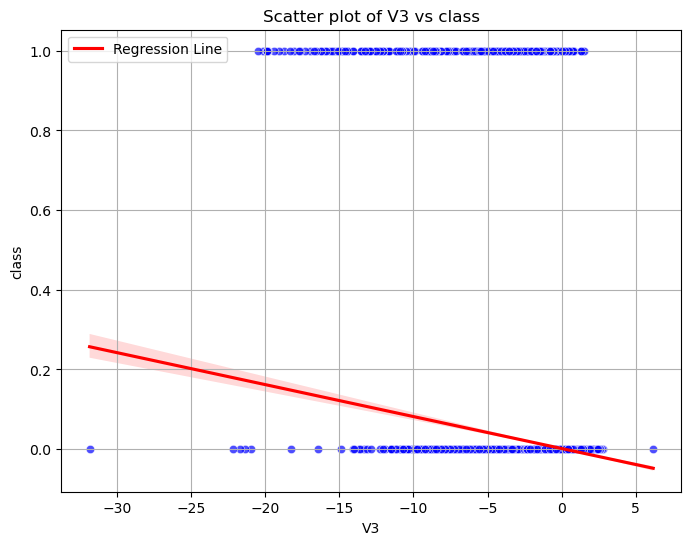

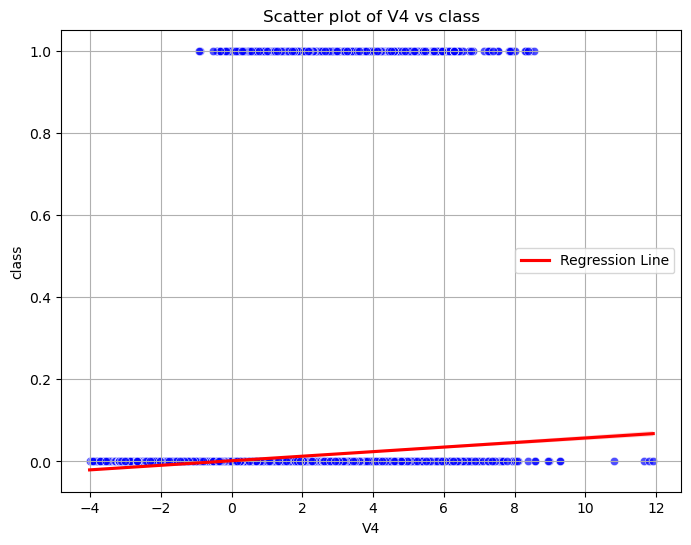

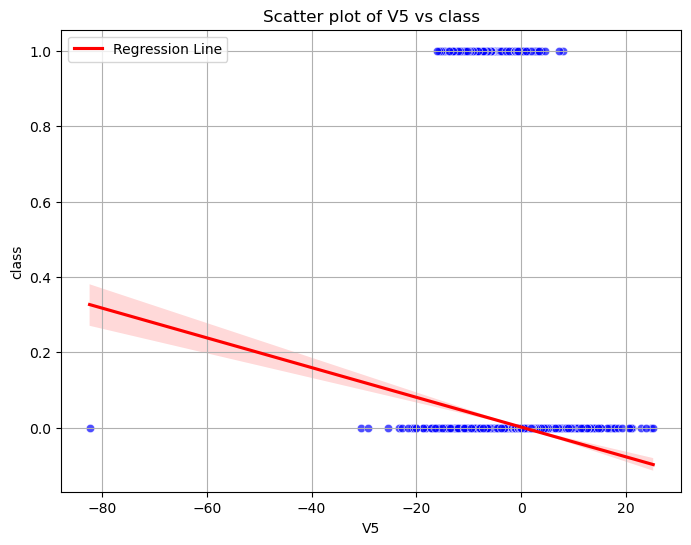

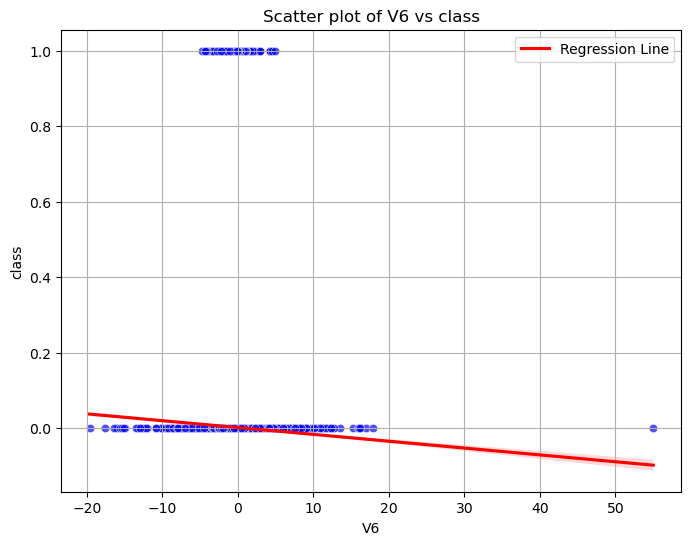

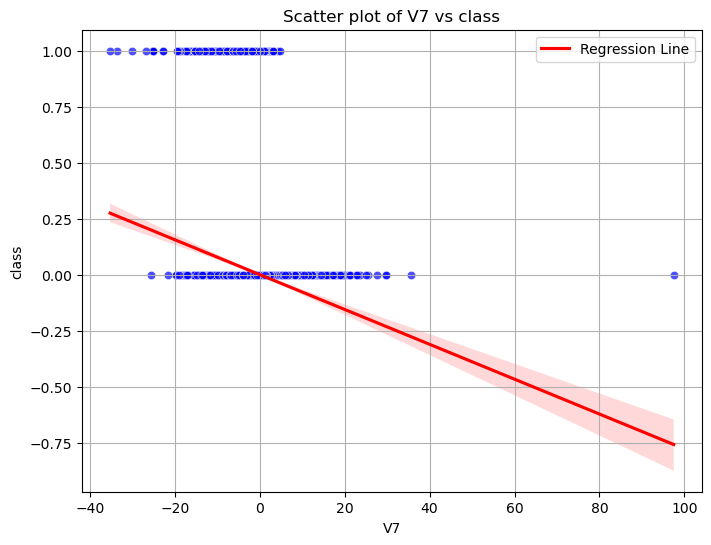

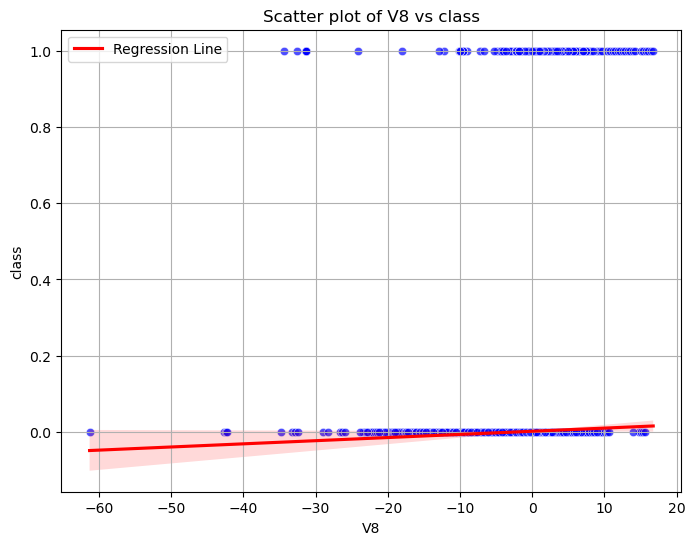

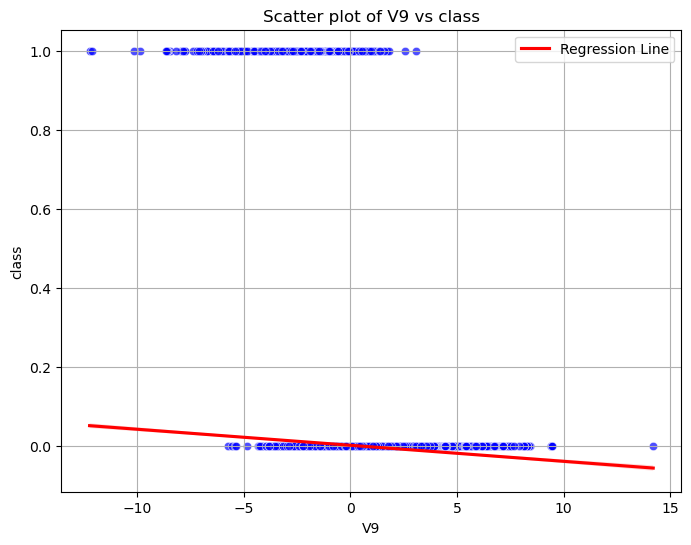

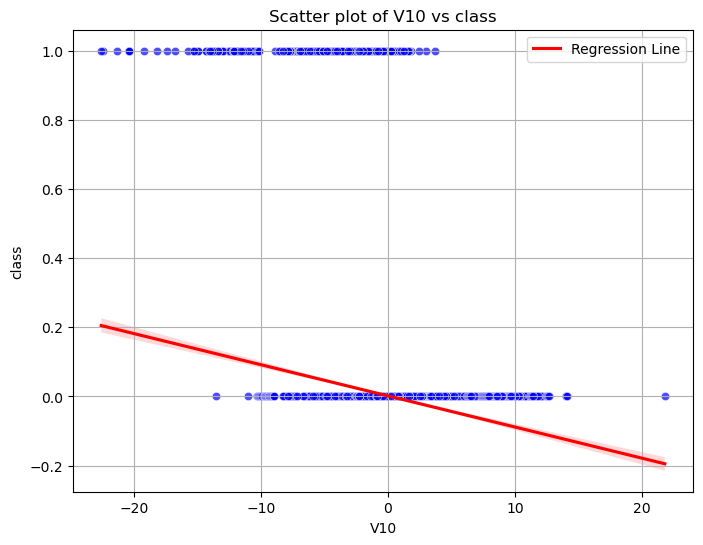

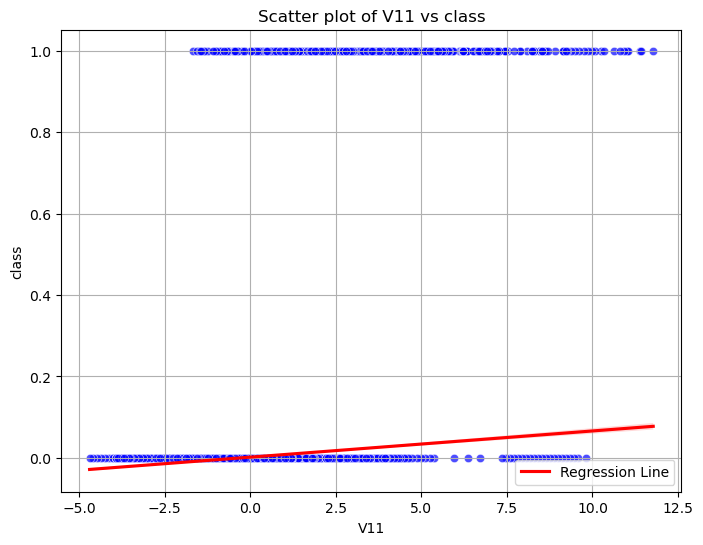

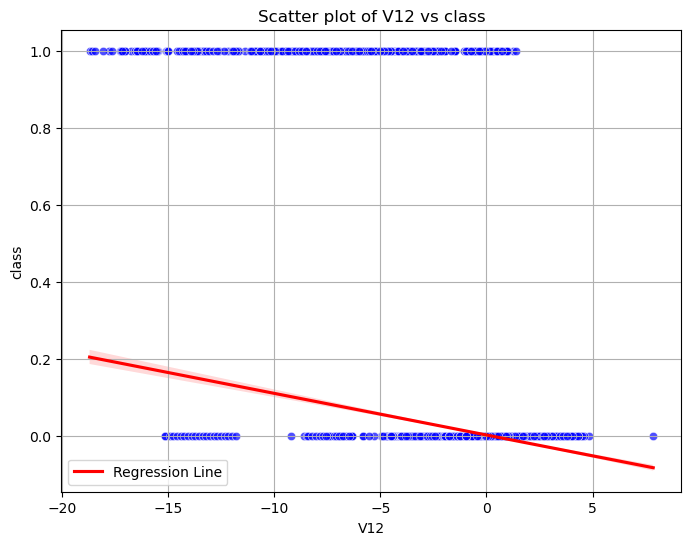

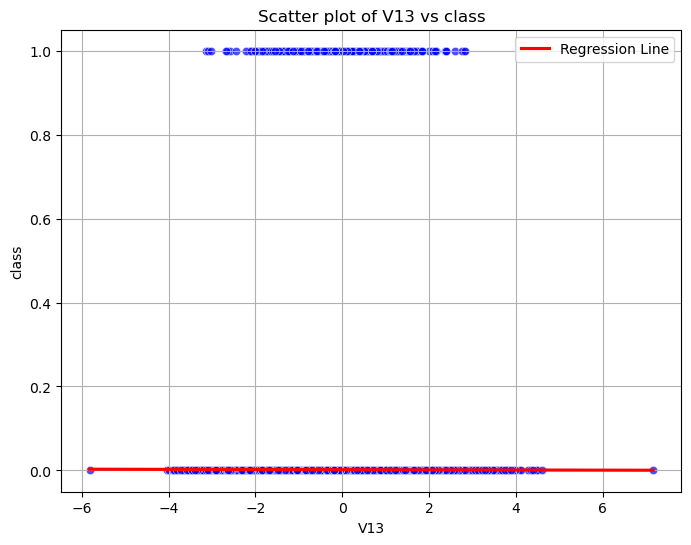

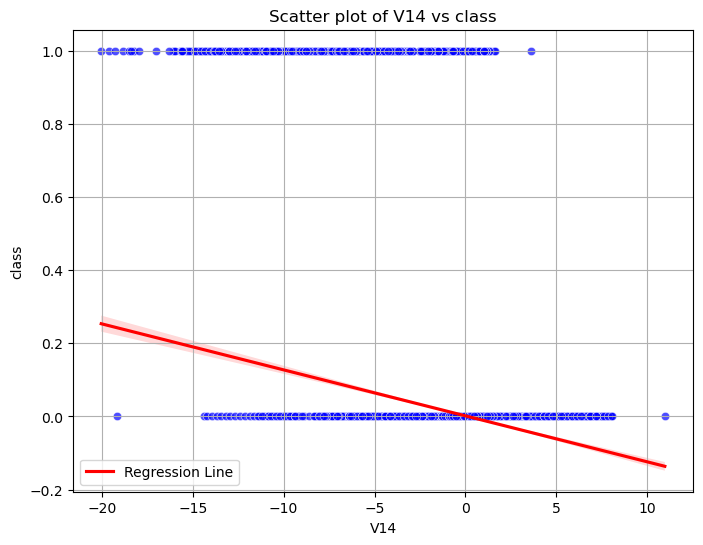

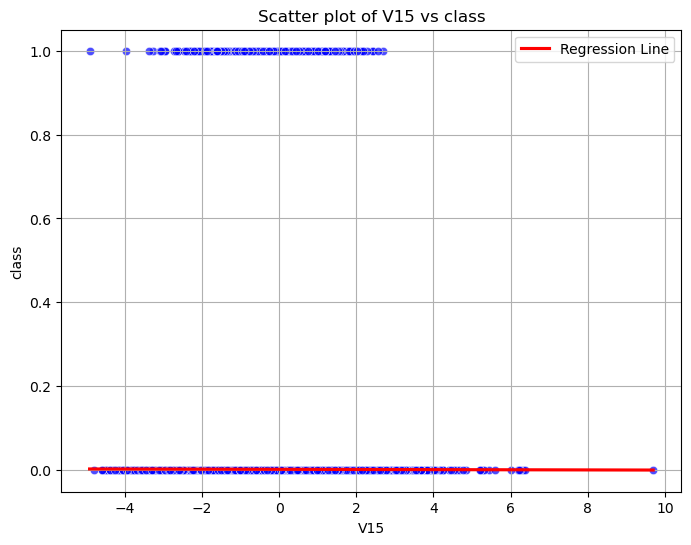

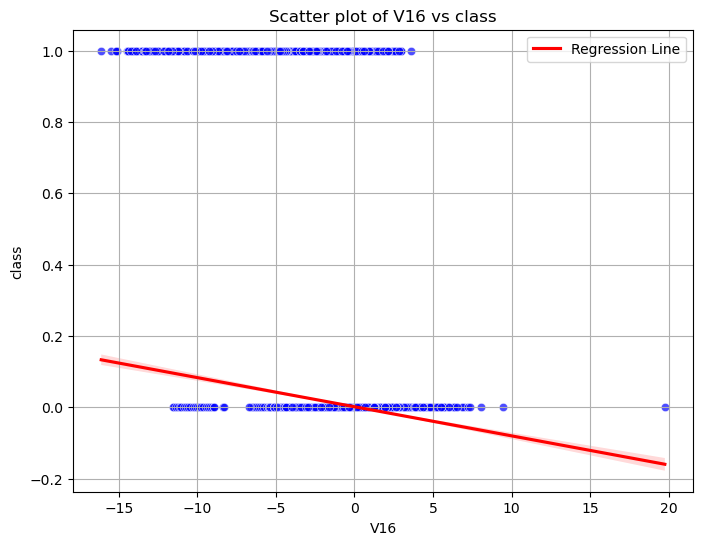

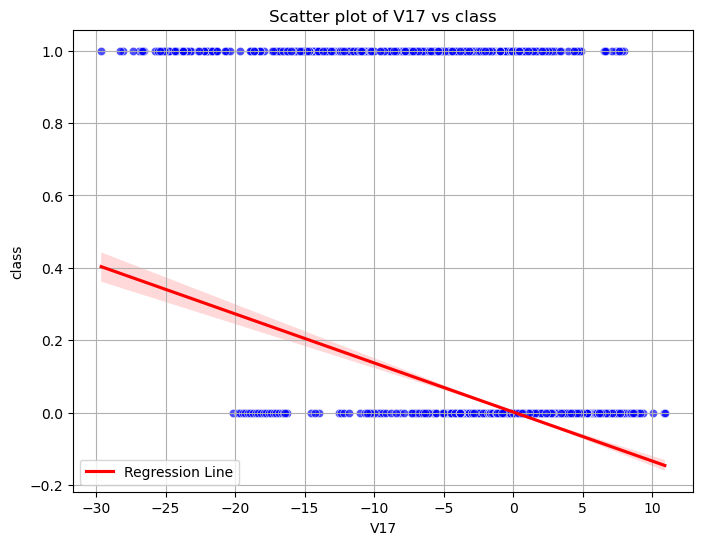

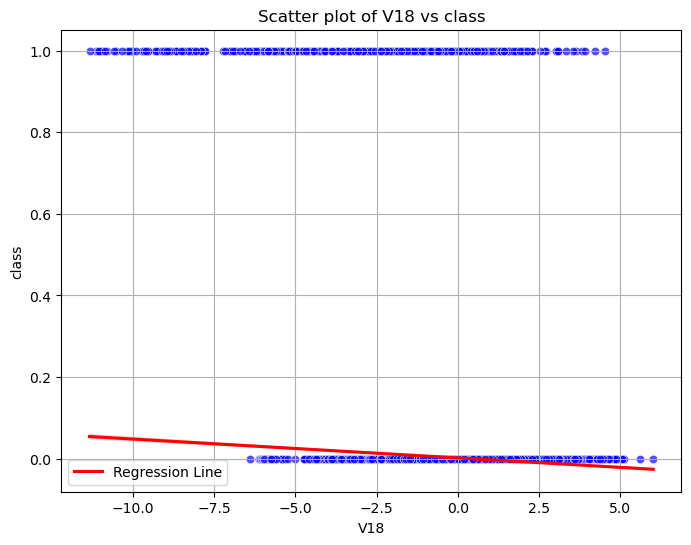

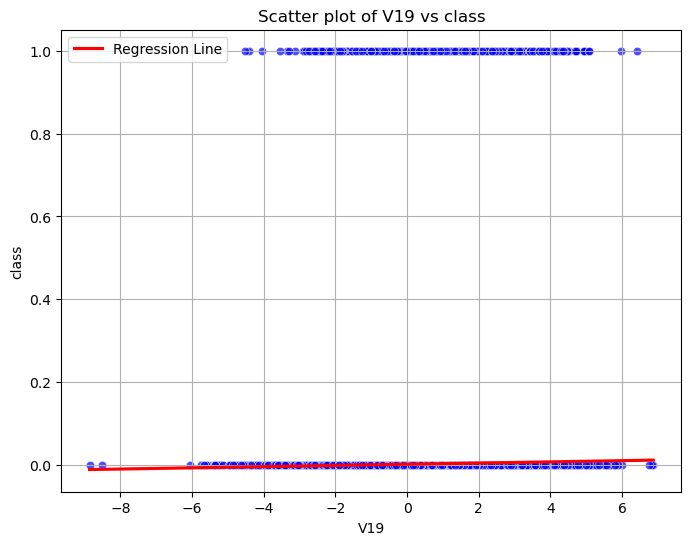

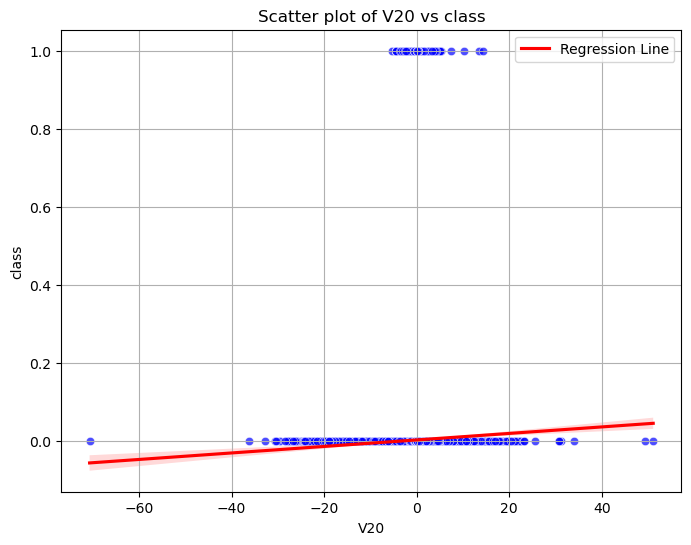

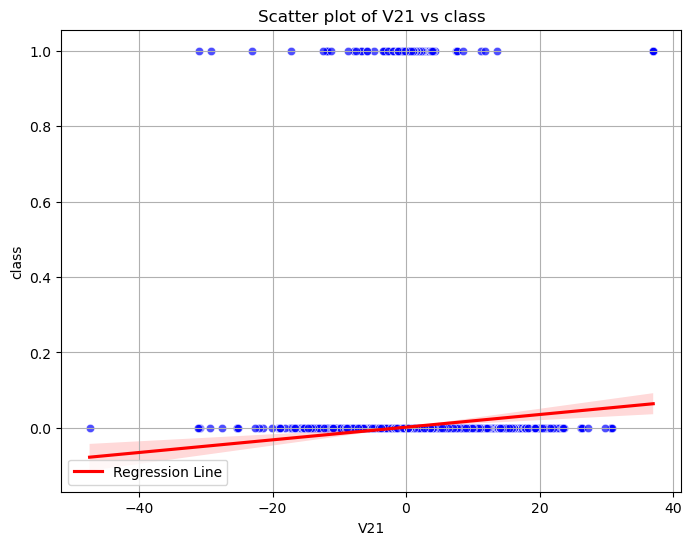

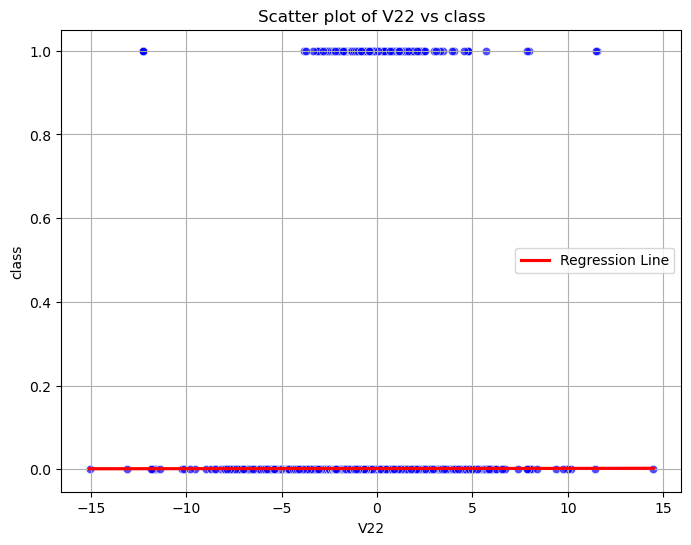

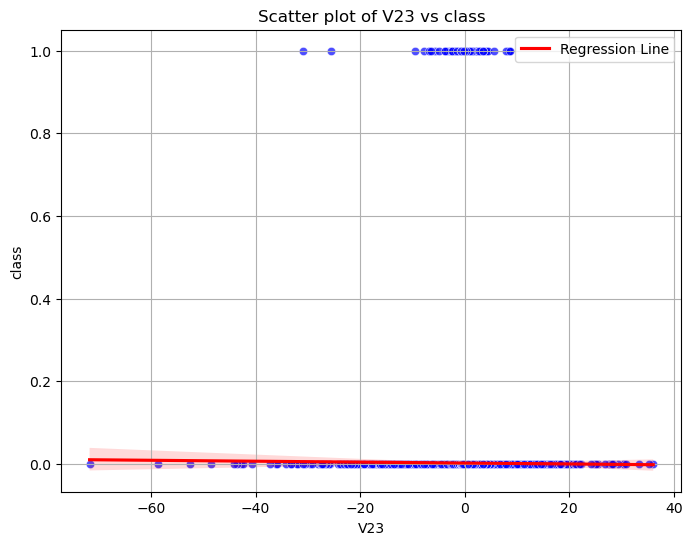

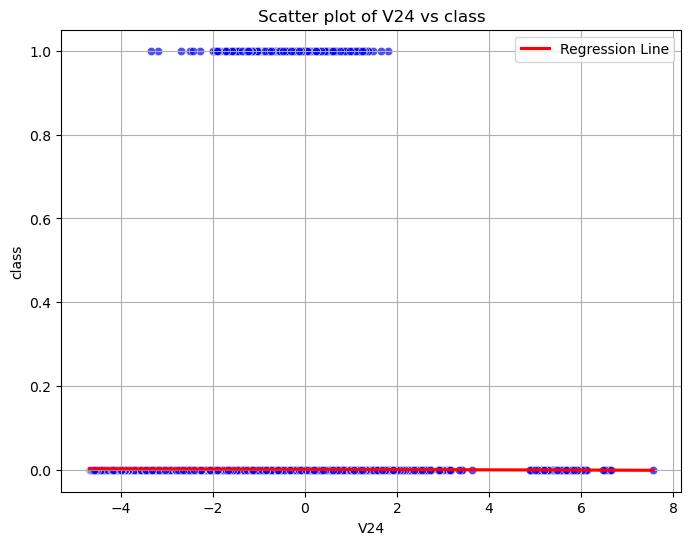

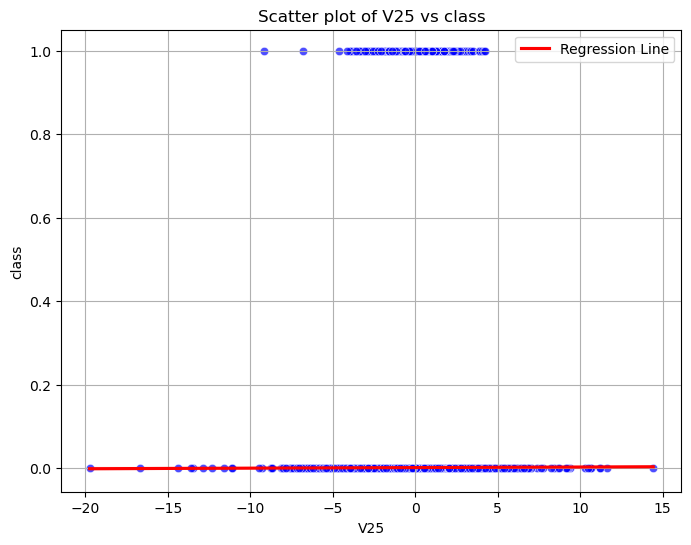

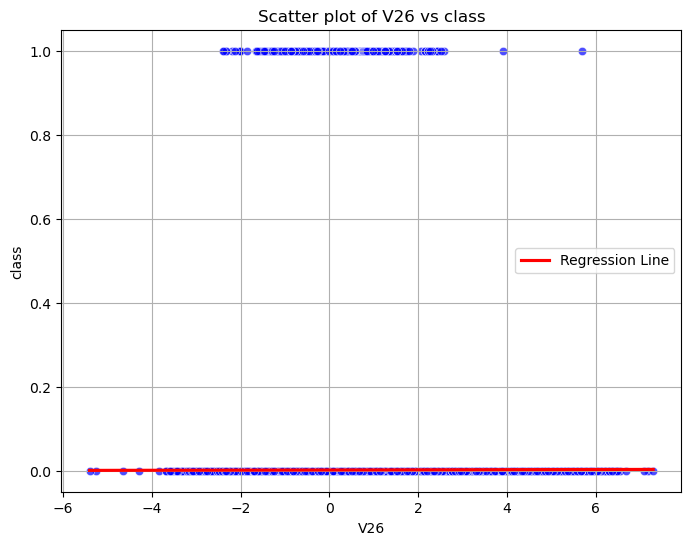

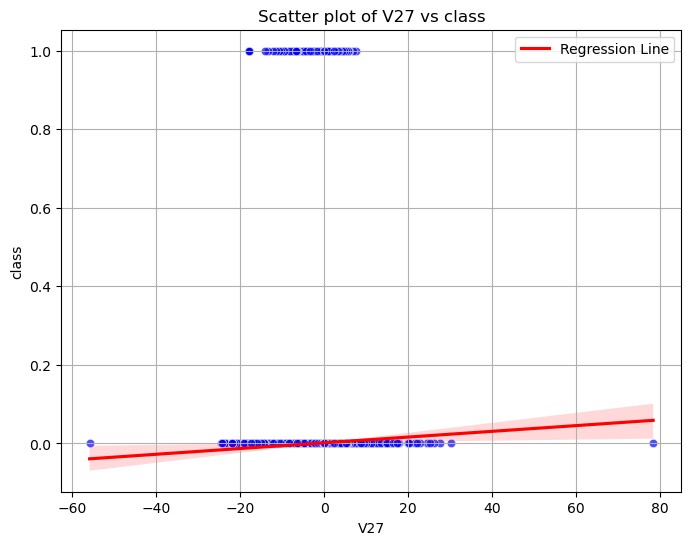

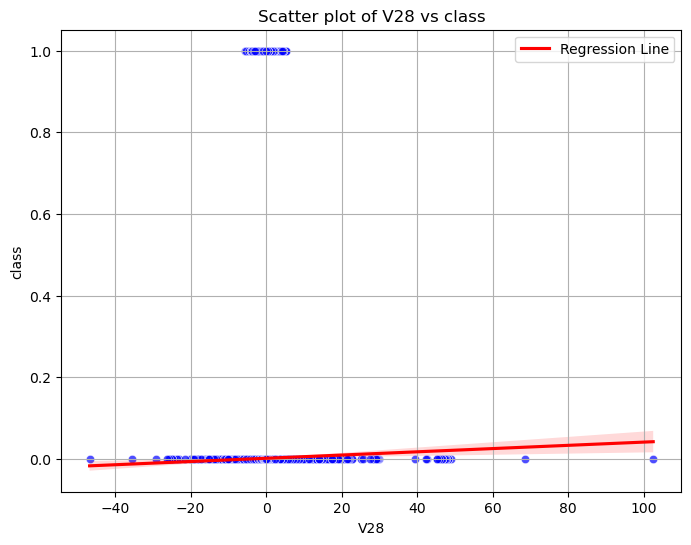

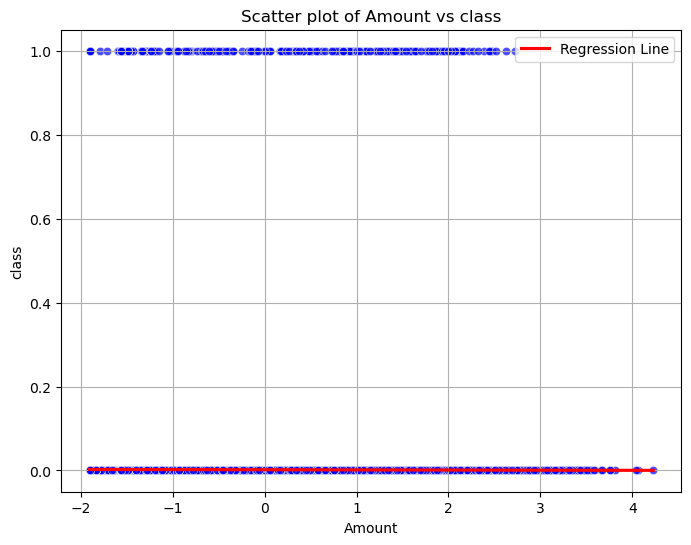

In [55]:
for feature in X:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=y, color='blue', alpha=0.7)
    sns.regplot(x=data[feature], y=y, scatter=False, color='red', label='Regression Line')
    plt.title(f'Scatter plot of {feature} vs class')
    plt.xlabel(feature)
    plt.ylabel('class')
    plt.legend()
    plt.grid(True)
    plt.show()

**Data Splitting**

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Selection**

In [75]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [79]:
##Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [80]:
##Random Forest Model (Bagging)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
##XGBoost Model (Gradient Boosting)
xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [65]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/46.2 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/46.2 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/46.2 kB ? eta -:--:--
     -------------------------------------- 46.2/46.2 kB 192.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/377.0 MB 14.1 MB/s eta 0:00:27
   ---------------------------------------- 1.0/377.0 MB 10.0 MB/s eta 0:00:38
   ---------------------------------------- 1.2/377.0 MB 9.3 MB/s eta 0:00:41
   ---------------------------------------- 1.3/377.0 MB 7.6 MB/s eta 0:00:50
   ---------------------------------------- 2.1/377.0 MB 8.3 MB/s eta 0:00:4

   ----------------------- ---------------- 217.7/377.0 MB 2.0 MB/s eta 0:01:18
   ----------------------- ---------------- 217.7/377.0 MB 2.0 MB/s eta 0:01:18
   ----------------------- ---------------- 217.7/377.0 MB 2.0 MB/s eta 0:01:18
   ----------------------- ---------------- 217.7/377.0 MB 2.0 MB/s eta 0:01:18
   ----------------------- ---------------- 217.7/377.0 MB 2.0 MB/s eta 0:01:18
   ----------------------- ---------------- 217.7/377.0 MB 2.0 MB/s eta 0:01:18
   ----------------------- ---------------- 217.7/377.0 MB 2.0 MB/s eta 0:01:18
   ----------------------- ---------------- 217.7/377.0 MB 2.0 MB/s eta 0:01:18
   ----------------------- ---------------- 218.8/377.0 MB 1.9 MB/s eta 0:01:23
   ----------------------- ---------------- 218.8/377.0 MB 1.9 MB/s eta 0:01:23
   ----------------------- ---------------- 218.8/377.0 MB 1.9 MB/s eta 0:01:23
   ----------------------- ---------------- 218.8/377.0 MB 1.9 MB/s eta 0:01:23
   ----------------------- -------------

In [68]:
##Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

neuralModel = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
neuralModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


**Model Training and Evaluation**

In [90]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

In [92]:
##Logistic Regression

print('Logistic Regression')
# Predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Classification Report
class_report = classification_report(y_test, y_pred_log_reg)
print("Classification Report:")
print(class_report)

# ROC AUC Score
y_probs_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Predict probabilities for ROC AUC
roc_auc = roc_auc_score(y_test, y_probs_log_reg)
print(f"ROC AUC Score: {roc_auc:.2f}")

Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.60      0.71        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.98


In [93]:
##Random Forest

print('Random Forest')
# Predictions on the test set
y_pred_rf = rf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Predict probabilities for ROC-AUC score
y_probs_rf = rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs_rf)
print(f"ROC-AUC Score: {roc_auc}")

Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9528616613358906


In [94]:
##XGBoost

print('XGBoost')
# Make predictions
y_pred_xgb = xgb.predict(X_test)       # Predicted class labels
y_probs_xgb = xgb.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class

# Evaluate performance
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs_xgb))

XGBoost
XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9811164195560047


In [95]:
##Neural Network

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])

print('Neural Network')
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict probabilities for ROC-AUC calculation
y_probs_nn = model.predict(X_test).ravel()

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs_nn)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Print classification report
y_pred_nn = (y_probs_nn > 0.5).astype(int)
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

Epoch 1/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 2/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 3/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9994 - val_loss: 0.0042
Neural Network
Test Loss: 0.0036
Test Accuracy: 0.9994
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
ROC-AUC Score: 0.9828
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.77      0.80        98

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



AUPRC

In [96]:
# Function to calculate AUPRC
def calculate_auprc(y_true, y_probs):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    return auc(recall, precision)

# Calculate AUPRC for each model
auprc_log_reg = calculate_auprc(y_test, y_probs_log_reg)
auprc_rf = calculate_auprc(y_test, y_probs_rf)
auprc_xgb = calculate_auprc(y_test, y_probs_xgb)
auprc_nn = calculate_auprc(y_test, y_probs_nn)

# Print AUPRC values
print(f"AUPRC for Logistic Regression: {auprc_log_reg}")
print(f"AUPRC for Random Forest: {auprc_rf}")
print(f"AUPRC for XGBoost: {auprc_xgb}")
print(f"AUPRC for Neural Network: {auprc_nn}")

AUPRC for Logistic Regression: 0.7577487975973466
AUPRC for Random Forest: 0.8724838313091324
AUPRC for XGBoost: 0.8776143513157532
AUPRC for Neural Network: 0.8293092808337738


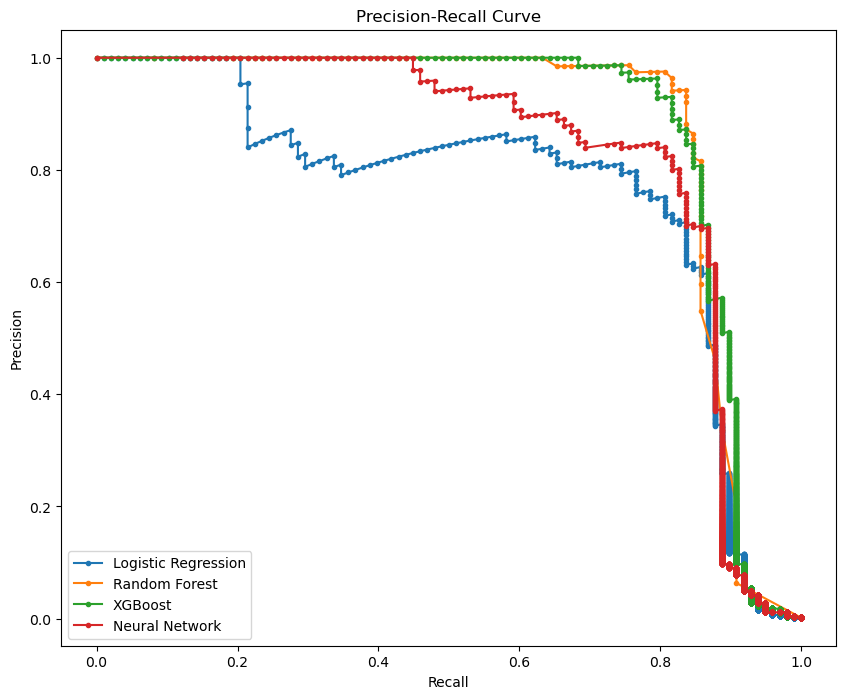

In [99]:
# Plot Precision-Recall curves
def plot_precision_recall_curve(y_true, y_probs, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    plt.plot(recall, precision, marker='.', label=model_name)

plt.figure(figsize=(10, 8))
plot_precision_recall_curve(y_test, y_probs_log_reg, 'Logistic Regression')
plot_precision_recall_curve(y_test, y_probs_rf, 'Random Forest')
plot_precision_recall_curve(y_test, y_probs_xgb, 'XGBoost')
plot_precision_recall_curve(y_test, y_probs_nn, 'Neural Network')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

After considering AUPRC graph and ROC-POC scores, XGBoost Model seems best fit for deployment.

**Deployment and Monitoring**

Saving model in pickle format

In [105]:
xgb.save_model("my_fraud_detection_model.pickle")

In [113]:
from fastapi import FastAPI
from fastapi.responses import JSONResponse
from uvicorn import run

In [114]:
model_path = "my_fraud_detection_model.pickle"

def load_model():
    model = xgb.Booster()
    model.load_model(model_path)
    return model

In [115]:
app = FastAPI()

In [119]:
@app.post("/predict")
async def predict(data: dict):
    # Extract features from the request data
    features = data.copy()

    # Preprocess data
    features_array = np.array([[features]])

    # Make prediction using the loaded
    prediction = model.predict(features_array)

    # Return prediction as JSON response
    return JSONResponse({"prediction": prediction[0]})  # Assuming single prediction